# figures paper from HyDrop (1 & 2) and 10x (1 & 2) object together

In [68]:
from pycisTopic.clust_vis import (
    find_clusters,
    run_umap,
    run_tsne,
    plot_metadata,
    plot_topic,
    cell_topic_heatmap
)
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.patches import Patch
import h5py
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [18]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

# not downsampled

In [69]:
#after models - models are submitted
# Load cisTopic object
import pickle
infile = open('/lustre1/project/stg_00002/lcb/hydrop_v2_paper/revision/mcortex/cistopic/cistopic_objs/cistopic_obj_otsu_mouse_cortex_filtered_09062025_130topics_annot.pkl', 'rb')
cistopic_obj = pickle.load(infile)
infile.close()

In [70]:
print(cistopic_obj)

CistopicObject from project cisTopic_merge with n_cells × n_regions = 92363 × 1086694


In [5]:
cistopic_obj.projections

{'cell': {'UMAP':                                                        UMAP_1     UMAP_2
  GAGCTAGTAAATCTCAACAGATGAAGTGCG___HYA__combined_...  14.731062  -2.158707
  GAGCTAGTAACCGGTTACATATGAAGTGCG___HYA__combined_...  14.745278  -2.144181
  TAGCTGTTGGATAGGTACGGCCTTCGTTAA___HYA__combined_...  -2.302132  17.635048
  ACTAATGACGGACGGACGGTCGAACTTCCT___HYA__combined_...  -3.906107   5.489783
  GACCAATCGAAGCTTGAGAGTGACGAGATG___HYA__combined_...  -0.517377  10.217726
  ...                                                       ...        ...
  ACCAGACGTAATTCGGTCAGAGAACAATCC___HYA__combined_...  10.689415  16.658148
  AGTTGGAAGAGGCTTGAGAGCATCTCAGGT___HYA__combined_...  12.261332  17.438665
  GAGGTACTACCAACCAACGGCACAAGCATT___HYA__combined_...  16.028111   5.818558
  ACCTCGAATCGACGGACGGTCGTCATCCTA___HYA__combined_...  16.437782   6.064401
  CCATCTCTGTATCAGAAGAAAAGTGTAGAA___HYA__combined_...  12.331005  17.400267
  
  [92363 rows x 2 columns],
  'tSNE':                                            

In [6]:
cistopic_obj.cell_data.columns

Index(['Unique_nr_frag', 'Total_nr_frag_in_regions', 'beads', 'barcode',
       'cisTopic_log_nr_acc', 'Dupl_nr_frag',
       'preliminary_mouse_annot_23072024', 'pycisTopic_leiden_10_0.6',
       'tech_simple', 'pycisTopic_leiden_10_2', 'sample_prep',
       'Zu_paper_lift_over_simple', 'FRIP',
       'kde__log_Unique_nr_frag_in_regions__TSS_enrichment',
       'Unique_nr_frag_in_regions', 'Dupl_rate', 'refined_annot',
       'refined_annot_simple', 'kde__log_Unique_nr_frag_in_regions__Dupl_rate',
       'cisTopic_log_nr_frag', 'pycisTopic_leiden_10_1.2', 'cisTopic_nr_frag',
       'dict_BICCN_corrected_08112024', 'region_label',
       'Doublet_scores_fragments', 'Zu_paper_lift_over',
       'kde__log_Unique_nr_frag_in_regions__FRIP', 'cisTopic_nr_acc',
       'sample_id', 'techxZu_paper_lift_over_simple', 'tech', 'TSS_enrichment',
       'Predicted_doublets_fragments', 'Total_nr_frag', 'Log_unique_nr_frag',
       'Log_total_nr_frag', 'pycisTopic_leiden_10_2.5', 'cleaned_up_annot',


## counting

In [7]:
sample_counts = cistopic_obj.cell_data['tech'].value_counts().to_dict()
print(sample_counts)

{'HyDrop_v2': 67080, '10x_v2_Chromium_Controler': 6478, '10x_v1.1_Chromium_X': 6316, 'HyDrop_v1': 5805, '10x_v1': 3440, '10x_v2': 3244}


In [8]:
sample_counts = cistopic_obj.cell_data['tech_simple'].value_counts().to_dict()
print(sample_counts)

{'HyDrop_v2': 67080, '10x_v1': 9756, '10x_v2': 9722, 'HyDrop_v1': 5805}


In [9]:
sample_counts = cistopic_obj.cell_data['dict_BICCN_corrected_08112024'].value_counts().to_dict()
print(sample_counts)

{'Oligo': 18921, 'L2_3_IT': 12813, 'L4_IT': 9148, 'L6_CT': 7480, 'Astro': 7019, 'L5_IT': 6108, 'Micro_PVM': 5917, 'OPC': 4317, 'L6_IT': 4258, 'Pvalb': 3725, 'L5_ET': 2725, 'Sst': 2381, 'Lamp5': 1845, 'L6b': 1638, 'L5_6_NP': 1569, 'Sncg_Vip': 1479, 'Endo_VLMC': 1020}


In [10]:
cluster_avg = cistopic_obj.cell_data.groupby('tech_simple')['Unique_nr_frag_in_regions'].mean()
sorted_clusters = cluster_avg.sort_values()
table = sorted_clusters.reset_index()
table.columns = ['tech', 'Unique_nr_frag_in_regions']
print(table)

        tech  Unique_nr_frag_in_regions
0  HyDrop_v1                3244.679242
1  HyDrop_v2                5417.869022
2     10x_v2               11432.594734
3     10x_v1               14406.250615


In [11]:
cluster_avg = cistopic_obj.cell_data.groupby('tech_simple')['Unique_nr_frag'].mean()
sorted_clusters = cluster_avg.sort_values()
table = sorted_clusters.reset_index()
table.columns = ['tech', 'Unique_nr_frag']
print(table)

        tech  Unique_nr_frag
0  HyDrop_v1     9940.927649
1  HyDrop_v2    11164.859123
2     10x_v2    22730.591648
3     10x_v1    26151.705310


In [12]:
cluster_avg = cistopic_obj.cell_data.groupby('tech_simple')['FRIP'].mean()
sorted_clusters = cluster_avg.sort_values()
table = sorted_clusters.reset_index()
table.columns = ['tech', 'FRIP']
print(table)

        tech      FRIP
0  HyDrop_v1  0.350367
1  HyDrop_v2  0.513523
2     10x_v2  0.520953
3     10x_v1  0.569794


In [13]:
cluster_avg = cistopic_obj.cell_data.groupby('tech_simple')['TSS_enrichment'].mean()
sorted_clusters = cluster_avg.sort_values()
table = sorted_clusters.reset_index()
table.columns = ['tech', 'TSS_enrichment']
print(table)

        tech  TSS_enrichment
0  HyDrop_v2       11.686440
1  HyDrop_v1       15.025508
2     10x_v2       18.612673
3     10x_v1       19.233553


# color dict

In [38]:
color_dict = {'Zu_paper_lift_over_simple':
              {'Oligo': '#CC79A7', 
               'L2_3_IT': '#E69F00', 
               #'limbic_system': '#56B4E9', 
               #'D1_2_STR_INH': '#009E73', 
               'L6_CT': '#F0E442', 
               #'EXC_L4_IT_CTX': '#0072B2', 
               'Astro': '#D55E00', 
               'Micro_PVM': '#000000', 
               'OPC': '#28787B', 
               'L6_IT': '#84BC3D', 
               'Pvalb': '#CEA427', 
               #'AMY_BST_INH': '#547953', 
               #'Hippocampus_DG': '#9772D3', 
               'L5_ET': '#70DEC5', 
               'L5_6_NP': '#8B167D', 
               #'EXC_L2_IT_ENT_PPP': '#C1C098', 
               'L5_IT': '#9772D3', 
               'Sst': '#6A31EC', 
              #'EXC_PIR_L2_3_prime_ENT': '#4C5BF2',
               #'L2_3_IT_ENT': '#33CFA0', 
               #'INH_STR_OT_D3': '#5A5A11', 
               'Lamp5': '#90BF5D', 
              # 'AMY_Hypothalamic_area': '#E1CA38', 
               'L6b': '#5BF5EE', 
               #'L5_6_NP': '#E037BF', 
              # 'IT_AON_TT_DP': '#DE7830', 
               'Sncg_Vip': '#55508B', 
               #'Hippocampus_CA1': '#26D2FA', 
              # 'OB': '#E07B1E', 
               #'PAL-STR_INH': '#843034', 
               'Endo_VLMC': '#6CD1CB', 
               #'NA': '#11654D', 
              # 'LSX_INH': '#000000', 
               #'EXC_L6_L5_IT': '#554766', 
               #'CLA_EPd_L6_IT_Car3_plus_CTX': '#127B1A', 
              # 'OB_STR_CTX': '#4676A3', 
              # 'L2_3_IT_RsP_EXC': '#F74F3F', 
              # 'EXC_CA3_2': '#F50F51', 
              # 'Astroependymal_NN': '#E216A1'
              },
              'tech_simple':
              {'HyDrop_v2': '#E69F00', 
               '10x_v2': '#0072B2', 
               '10x_v1': '#000000', 
               'HyDrop_v1': '#F50F51'}}
                

In [39]:
colors_dict_BICCN_corrected_08112024 ={'Oligo': '#CC79A7', 
               'L2_3_IT': '#E69F00', 
              # 'limbic_system': '#56B4E9', 
               #'D1_2_STR_INH': '#009E73', 
               'L6_CT': '#F0E442', 
               'L4_IT': '#0072B2', 
               'Astro': '#D55E00', 
               'Micro_PVM': '#000000', 
               'OPC': '#28787B', 
               'L6_IT': '#84BC3D', 
               'Pvalb': '#CEA427', 
               #'AMY_BST_INH': '#547953', 
               #'Hippocampus_DG': '#9772D3', 
               #                        'EXC_L4_IT_CTX': '#0072B2', 
               'L5_ET': '#26D2FA', 
               'L5_6_NP': '#8B167D', 
               #'EXC_L2_IT_ENT_PPP': '#C1C098', 
               'L5_IT': '#9772D3', 
               'Sst': '#6A31EC', 
               #'EXC_PIR_L2_3_prime_ENT': '#4C5BF2',
               #'L2_3_IT_ENT': '#33CFA0', 
              # 'INH_STR_OT_D3': '#5A5A11', 
               'Lamp5': '#90BF5D', 
              # 'AMY_Hypothalamic_area': '#E1CA38', 
               'L6b': '#5BF5EE', 
               #'L5_6_NP': '#E037BF', 
               #'IT_AON_TT_DP': '#DE7830', 
               'Sncg_Vip': '#55508B', 
              # 'Hippocampus_CA1': '#26D2FA', 
              # 'OB': '#E07B1E', 
               #'PAL-STR_INH': '#843034', 
               'Endo_VLMC': '#6CD1CB', 
              # 'NA': '#11654D', 
              # 'LSX_INH': '#000000', 
               #'EXC_L6_L5_IT': '#554766', 
               #'CLA_EPd_L6_IT_Car3_plus_CTX': '#127B1A', 
              # 'OB_STR_CTX': '#4676A3', 
              # 'L2_3_IT_RsP_EXC': '#F74F3F', 
              # 'EXC_CA3_2': '#F50F51', 
              # 'Astroependymal_NN': '#E216A1'
                                  }

In [49]:
colors_dict_BICCN_highcontrast = {
    'Oligo': '#CC79A7',         # unchanged
    'L2_3_IT': '#E69F00',       # unchanged
    'L6_CT': '#0072B2',         # changed from yellow to strong blue
    'L4_IT': '#009E73',         # changed from dark blue to teal
    'Astro': '#D55E00',         # unchanged
    'Micro_PVM': '#000000',     # unchanged
    'OPC': '#332288',           # deep indigo
    'L6_IT': '#117733',         # dark green
    'Pvalb': '#882255',         # dark red
    'L5_ET': '#44AA99',         # medium teal
    'L5_6_NP': '#AA4499',       # purple pink
    'L5_IT': '#DDCC77',         # soft yellow
    'Sst': '#CC6677',           # soft red
    'Lamp5': '#88CCEE',         # light blue
    'L6b': '#999933',           # olive green
    'Sncg_Vip': '#1177BB',      # same as Pvalb for now, adjust if needed
    'Endo_VLMC': '#994F00',     # dark brown
}


In [17]:
colors_tech = {'HyDrop_v2': '#E69F00', 
               '10x_v2': '#0072B2', 
               '10x_v1': '#000000', 
               'HyDrop_v1': '#F50F51'}

# tSNEs

## cell types

/lustre1/project/stg_00002/mambaforge/vsc34498/envs/pycistopic_polars_feb25/lib/python3.11/site-packages/pycisTopic/clust_vis.py:519: FutureWarning: The provided callable <function mean at 0x149ed8973ec0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  label_pos = label_pd.groupby(var).agg(
/lustre1/project/stg_00002/mambaforge/vsc34498/envs/pycistopic_polars_feb25/lib/python3.11/site-packages/pycisTopic/clust_vis.py:519: FutureWarning: The provided callable <function mean at 0x149ed8973ec0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  label_pos = label_pd.groupby(var).agg(
/lustre1/project/stg_00002/mambaforge/vsc34498/envs/pycistopic_polars_feb25/lib/python3.11/site-packages/pycisTopic/clust_vis.py:526: FutureWarning: Series.__getite

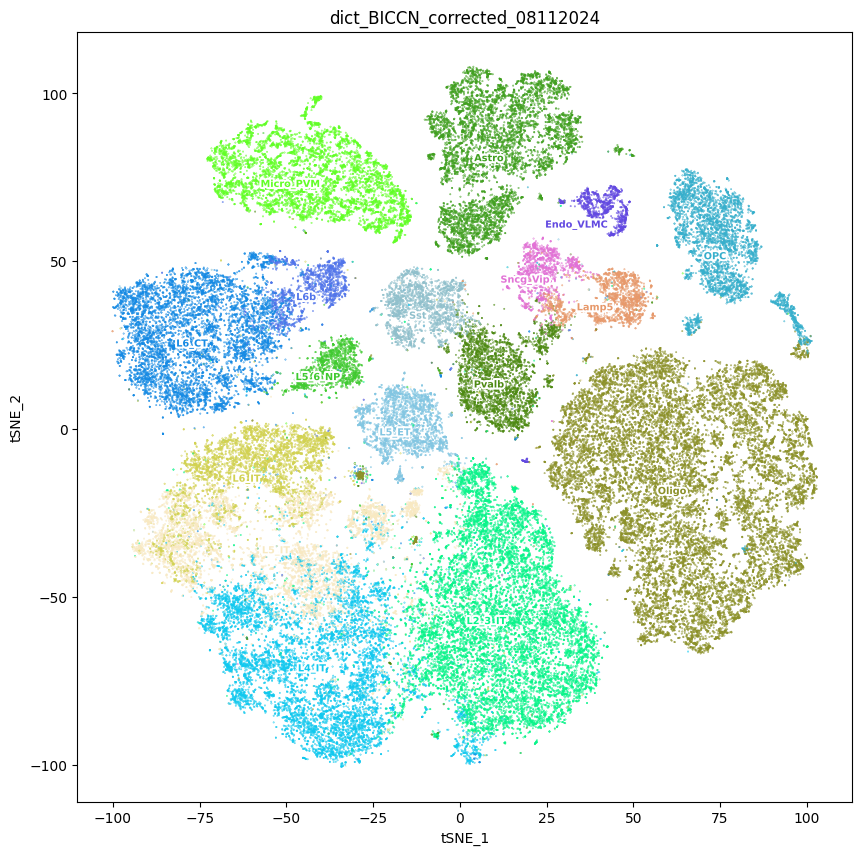

In [18]:
# model 120
plot_metadata(
    cistopic_obj,
    reduction_name='harmony_tech_tSNE',
    variables=['dict_BICCN_corrected_08112024'],
    target='cell', num_columns=1,figsize = (10,10),
    text_size=7,
    color_dictionary = color_dict,
    dot_size=0.1)

In [19]:
coord = cistopic_obj.projections["cell"]["harmony_tech_tSNE"]

In [51]:
colors = [colors_dict_BICCN_highcontrast[v] for v in cistopic_obj.cell_data['dict_BICCN_corrected_08112024']]

In [52]:
index = np.arange(coord.shape[0])
random.shuffle(index)

In [53]:
pwd

'/lustre1/project/stg_00002/lcb/hydrop_v2_paper/revision/mcortex/plots'

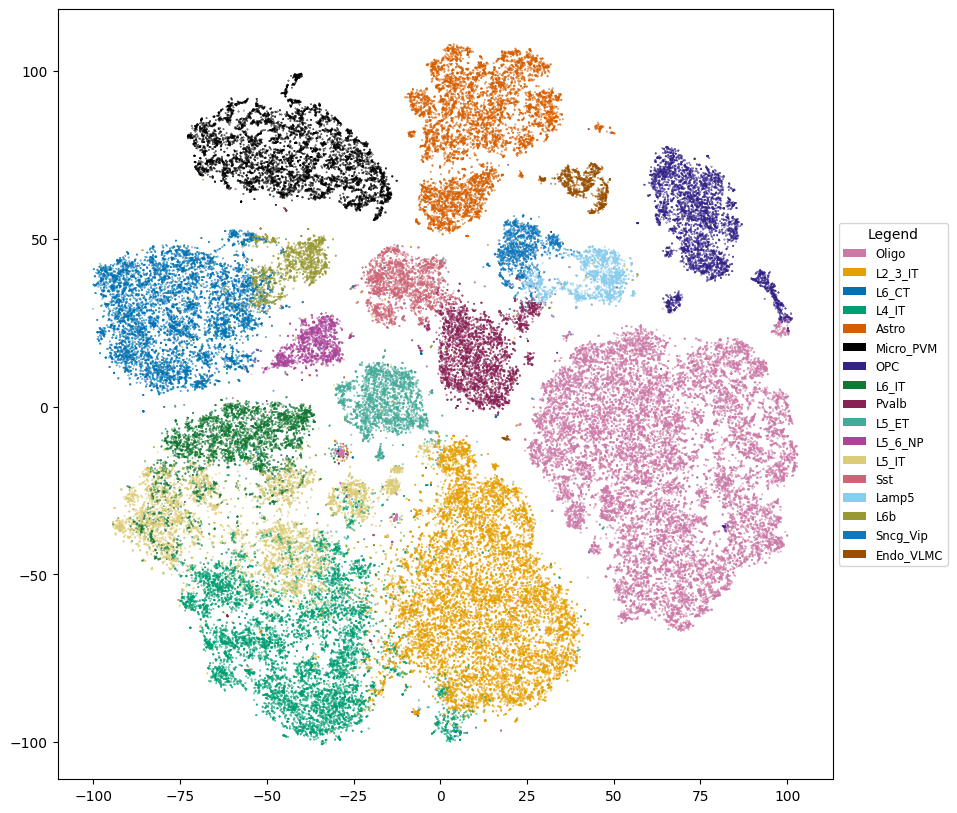

In [55]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(coord.iloc[index, 0], coord.iloc[index, 1], c=[colors[i] for i in index], s=0.1, alpha=1,rasterized=True )  # Using iloc for DataFrame indexing
legend_elements = [Patch(facecolor=color, label=label) for label, color in colors_dict_BICCN_highcontrast.items()]
ax.legend(handles=legend_elements, title="Legend", loc="center left", bbox_to_anchor=(1, 0.5), fontsize='small', title_fontsize='medium')
plt.savefig("tSNE_harmony_tech_with_shuffling_tech_cell_type.pdf", dpi=500, bbox_inches='tight', pad_inches=0.2)  # Save at 300 DPI for good quality
plt.show()

## tech

/lustre1/project/stg_00002/mambaforge/vsc34498/envs/pycistopic_polars_feb25/lib/python3.11/site-packages/pycisTopic/clust_vis.py:519: FutureWarning: The provided callable <function mean at 0x149ed8973ec0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  label_pos = label_pd.groupby(var).agg(
/lustre1/project/stg_00002/mambaforge/vsc34498/envs/pycistopic_polars_feb25/lib/python3.11/site-packages/pycisTopic/clust_vis.py:519: FutureWarning: The provided callable <function mean at 0x149ed8973ec0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  label_pos = label_pd.groupby(var).agg(
/lustre1/project/stg_00002/mambaforge/vsc34498/envs/pycistopic_polars_feb25/lib/python3.11/site-packages/pycisTopic/clust_vis.py:526: FutureWarning: Series.__getite

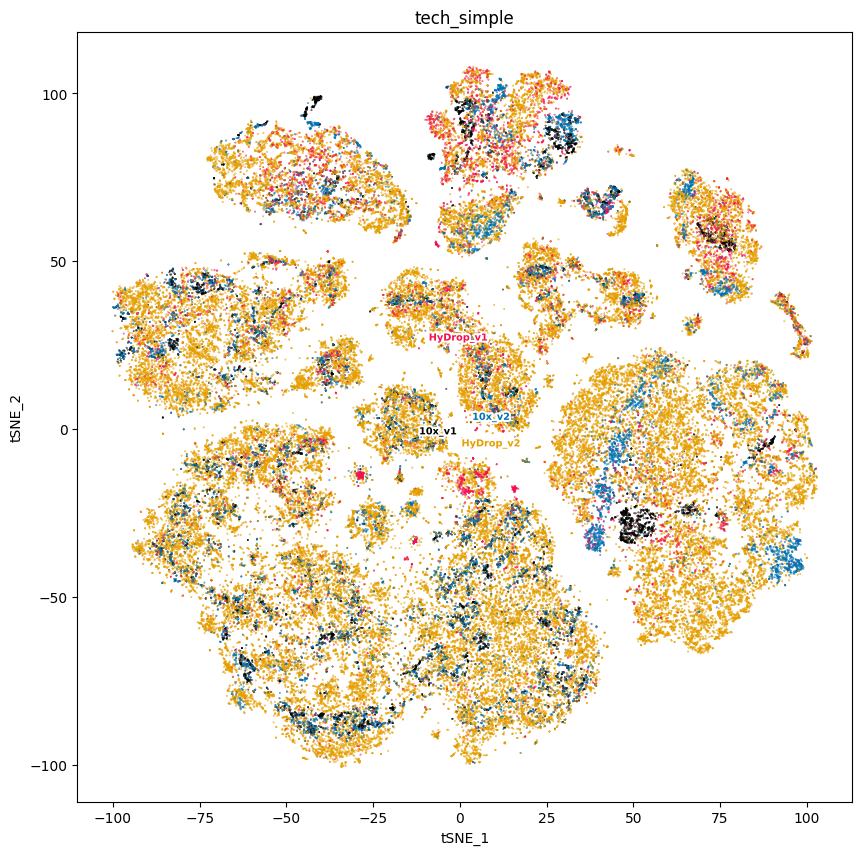

In [56]:
# model 120
plot_metadata(
    cistopic_obj,
    reduction_name='harmony_tech_tSNE',
    variables=['tech_simple'],
    target='cell', num_columns=1,figsize = (10,10),
    text_size=7,
    color_dictionary = color_dict,
    dot_size=0.1)

In [57]:
coord = cistopic_obj.projections["cell"]["tSNE"]

In [58]:
colors = [colors_tech[v] for v in cistopic_obj.cell_data['tech_simple']]

In [59]:
index = np.arange(coord.shape[0])
random.shuffle(index)

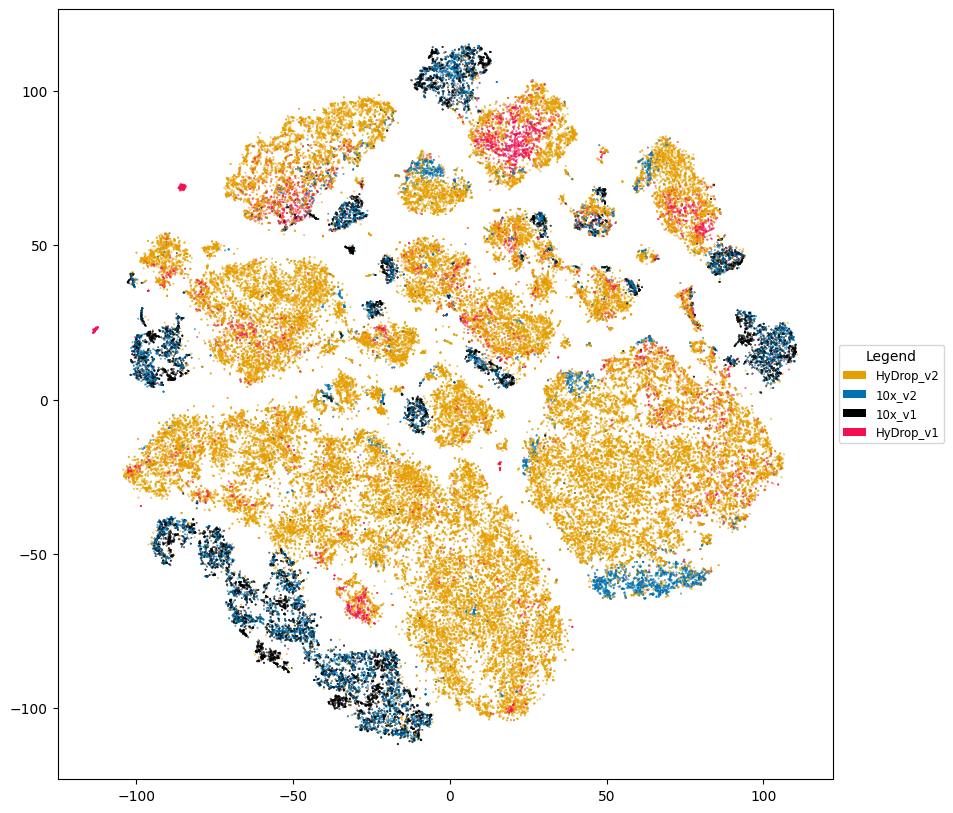

In [61]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(coord.iloc[index, 0], coord.iloc[index, 1], c=[colors[i] for i in index], s=0.1, alpha=1, rasterized=True)  # Using iloc for DataFrame indexing
legend_elements = [Patch(facecolor=color, label=label) for label, color in colors_tech.items()]
ax.legend(handles=legend_elements, title="Legend", loc="center left", bbox_to_anchor=(1, 0.5), fontsize='small', title_fontsize='medium')
plt.savefig("tSNE_no_harmony_tech_with_shuffling_tech.pdf", dpi=500, bbox_inches='tight', pad_inches=0.2)  # Save at 300 DPI for good quality
plt.show()

In [62]:
coord = cistopic_obj.projections["cell"]["harmony_tech_tSNE"]

In [63]:
colors = [colors_tech[v] for v in cistopic_obj.cell_data['tech_simple']]

In [16]:
index = np.arange(coord.shape[0])
random.shuffle(index)

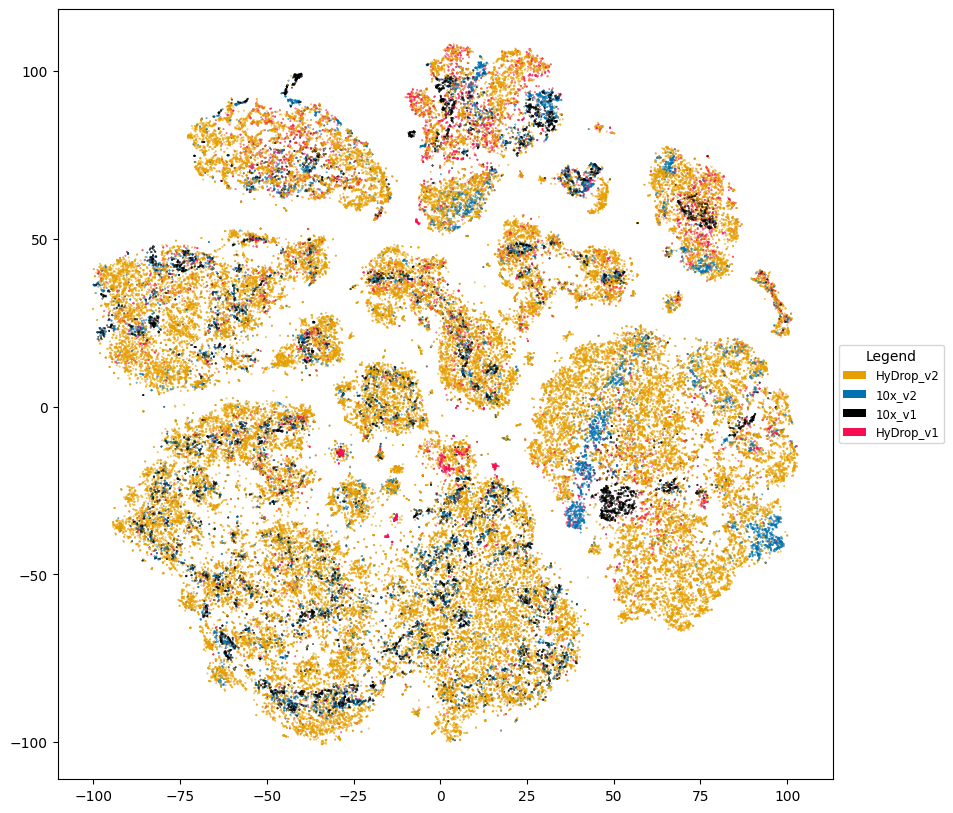

In [64]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(coord.iloc[index, 0], coord.iloc[index, 1], c=[colors[i] for i in index], s=0.1, alpha=1, rasterized=True)  # Using iloc for DataFrame indexing
legend_elements = [Patch(facecolor=color, label=label) for label, color in colors_tech.items()]
ax.legend(handles=legend_elements, title="Legend", loc="center left", bbox_to_anchor=(1, 0.5), fontsize='small', title_fontsize='medium')
plt.savefig("tSNE_harmony_tech_with_shuffling_tech.pdf", dpi=500, bbox_inches='tight', pad_inches=0.2)  # Save at 300 DPI for good quality
plt.show()

In [46]:
colors_tech

{'HyDrop_v2': '#E69F00',
 '10x_v2': '#0072B2',
 '10x_v1': '#000000',
 'HyDrop_v1': '#F50F51'}

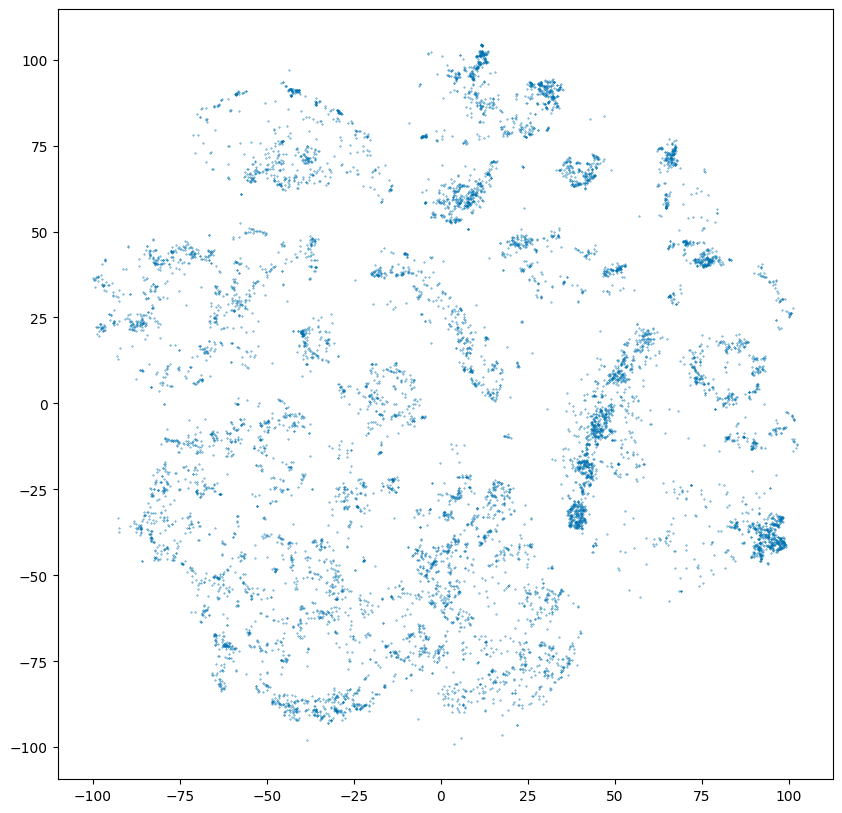

In [65]:
# Step 1: Assign the tSNE projection to 'coord'
coord = cistopic_obj.projections["cell"]["harmony_tech_tSNE"]

# Step 2: Filter the cell data to include only cells where 'tech' is '10x_v2'
filtered_data = cistopic_obj.cell_data[cistopic_obj.cell_data['tech_simple'] == '10x_v2']

# Step 3: Use the filtered data to get the corresponding tSNE coordinates
filtered_indices = filtered_data.index
filtered_coord = coord.loc[filtered_indices]

# Step 4: Create the scatter plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(filtered_coord.iloc[:, 0], filtered_coord.iloc[:, 1], c='#0072B2', s=0.1, alpha=1,rasterized=True)  # Plot all dots in the same color

# Optional: Add a legend or skip it if unnecessary
# ax.legend([Patch(facecolor='#E69F00')], ['10x_v2 Samples'], title="Legend", loc="center left", bbox_to_anchor=(1, 0.5), fontsize='small', title_fontsize='medium')

# Save the plot
plt.savefig("tSNE_harmony_tech_with_shuffling_tech_10xv2.pdf", dpi=500, bbox_inches='tight', pad_inches=0.2)

# Show the plot
plt.show()


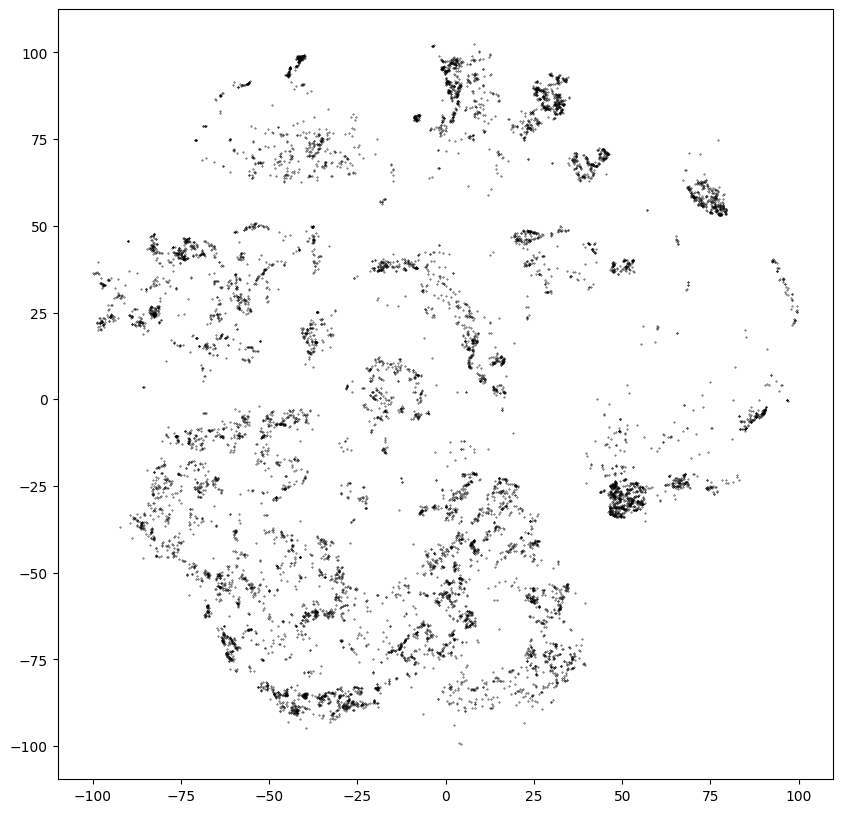

In [66]:
# Step 1: Assign the tSNE projection to 'coord'
coord = cistopic_obj.projections["cell"]["harmony_tech_tSNE"]

# Step 2: Filter the cell data to include only cells where 'tech' is '10x_v2'
filtered_data = cistopic_obj.cell_data[cistopic_obj.cell_data['tech_simple'] == '10x_v1']

# Step 3: Use the filtered data to get the corresponding tSNE coordinates
filtered_indices = filtered_data.index
filtered_coord = coord.loc[filtered_indices]

# Step 4: Create the scatter plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(filtered_coord.iloc[:, 0], filtered_coord.iloc[:, 1], c='#000000', s=0.1, alpha=1, rasterized=True)  # Plot all dots in the same color

# Optional: Add a legend or skip it if unnecessary
# ax.legend([Patch(facecolor='#E69F00')], ['10x_v2 Samples'], title="Legend", loc="center left", bbox_to_anchor=(1, 0.5), fontsize='small', title_fontsize='medium')

# Save the plot
plt.savefig("tSNE_harmony_tech_with_shuffling_tech_10xv1.pdf", dpi=500, bbox_inches='tight', pad_inches=0.2)

# Show the plot
plt.show()


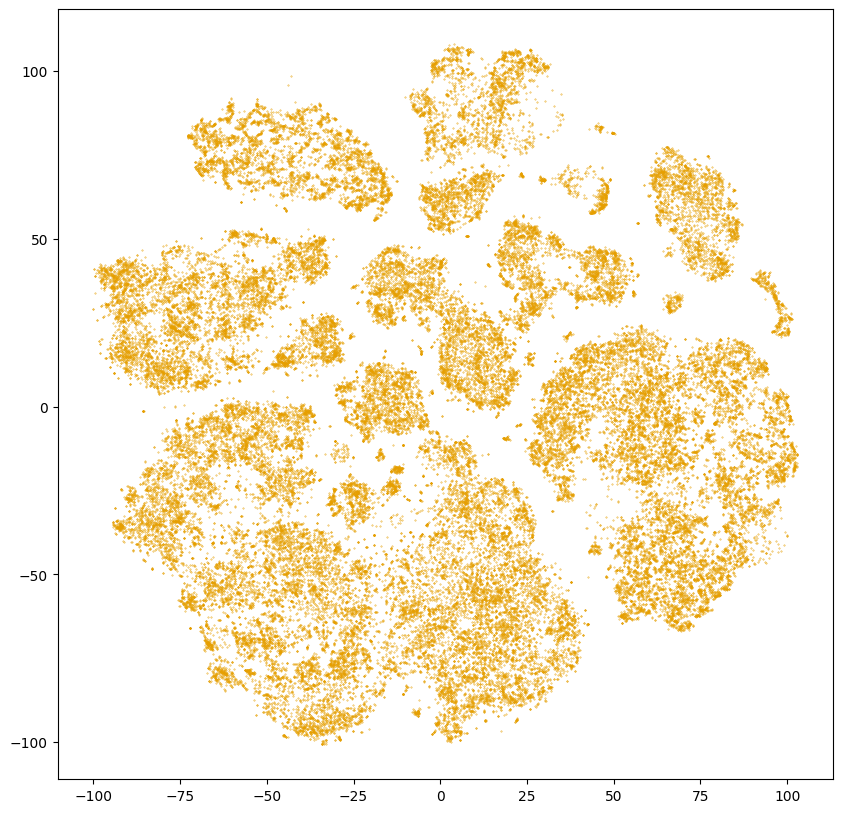

In [67]:
# Step 1: Assign the tSNE projection to 'coord'
coord = cistopic_obj.projections["cell"]["harmony_tech_tSNE"]

# Step 2: Filter the cell data to include only cells where 'tech' is '10x_v2'
filtered_data = cistopic_obj.cell_data[cistopic_obj.cell_data['tech_simple'] == 'HyDrop_v2']

# Step 3: Use the filtered data to get the corresponding tSNE coordinates
filtered_indices = filtered_data.index
filtered_coord = coord.loc[filtered_indices]

# Step 4: Create the scatter plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(filtered_coord.iloc[:, 0], filtered_coord.iloc[:, 1], c='#E69F00', s=0.1, alpha=1, rasterized=True)  # Plot all dots in the same color

# Optional: Add a legend or skip it if unnecessary
# ax.legend([Patch(facecolor='#E69F00')], ['10x_v2 Samples'], title="Legend", loc="center left", bbox_to_anchor=(1, 0.5), fontsize='small', title_fontsize='medium')

# Save the plot
plt.savefig("tSNE_harmony_tech_with_shuffling_tech_HyDropv2.pdf", dpi=500, bbox_inches='tight', pad_inches=0.2)

# Show the plot
plt.show()


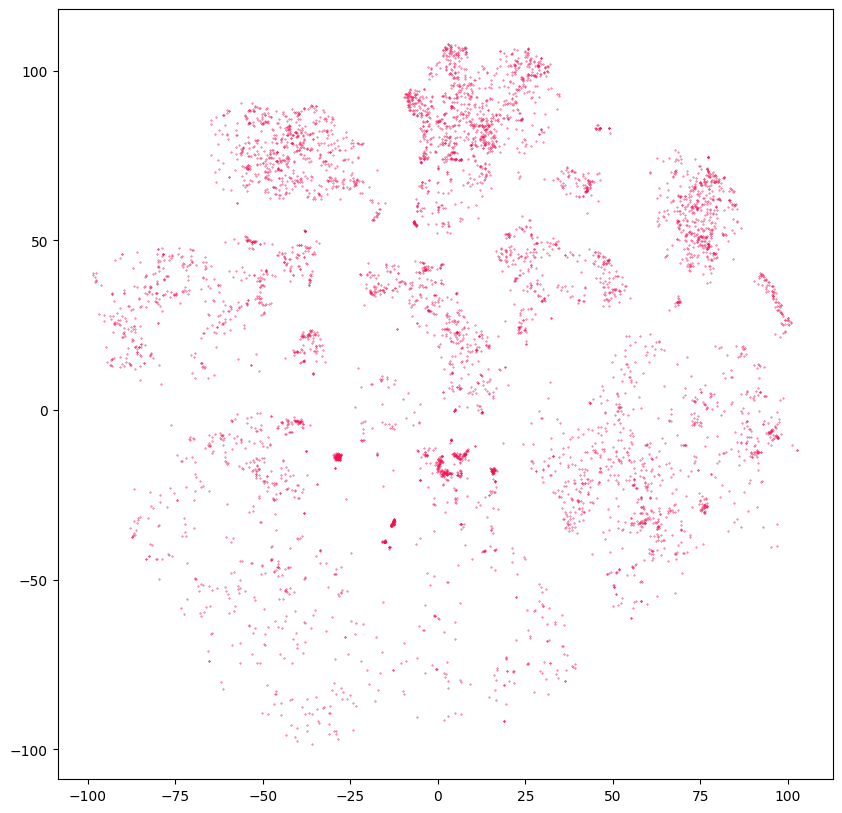

In [68]:
# Step 1: Assign the tSNE projection to 'coord'
coord = cistopic_obj.projections["cell"]["harmony_tech_tSNE"]

# Step 2: Filter the cell data to include only cells where 'tech' is '10x_v2'
filtered_data = cistopic_obj.cell_data[cistopic_obj.cell_data['tech_simple'] == 'HyDrop_v1']

# Step 3: Use the filtered data to get the corresponding tSNE coordinates
filtered_indices = filtered_data.index
filtered_coord = coord.loc[filtered_indices]

# Step 4: Create the scatter plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(filtered_coord.iloc[:, 0], filtered_coord.iloc[:, 1], c='#F50F51', s=0.1, alpha=1, rasterized=True)  # Plot all dots in the same color

# Optional: Add a legend or skip it if unnecessary
# ax.legend([Patch(facecolor='#E69F00')], ['10x_v2 Samples'], title="Legend", loc="center left", bbox_to_anchor=(1, 0.5), fontsize='small', title_fontsize='medium')

# Save the plot
plt.savefig("tSNE_harmony_tech_with_shuffling_tech_HyDropv1.pdf", dpi=500, bbox_inches='tight', pad_inches=0.2)

# Show the plot
plt.show()


# DARs

In [4]:
out_dir = '/lustre1/project/stg_00002/lcb/hydrop_v2_paper/revision/mcortex/cistopic/'

In [5]:
import pickle
infile = open(out_dir + 'DARs/DARs_HyDrop_v2.pkl', 'rb')
markers_dict_HyDrop_v2 = pickle.load(infile)
infile.close()

In [6]:
infile = open(out_dir + 'DARs/DARs_HyDrop_v1.pkl', 'rb')
markers_dict_HyDrop_v1 = pickle.load(infile)
infile.close()

In [10]:
infile = open(out_dir + 'DARs/DARs_10x.pkl', 'rb')
markers_dict_10x = pickle.load(infile)
infile.close()

In [8]:
x = [print(x + ': '+ str(len(markers_dict_HyDrop_v2[x]))) for x in markers_dict_HyDrop_v2.keys()]

Astro: 17385
Endo_VLMC: 11013
L2_3_IT: 38358
L5_6_NP: 13379
L5_ET: 25290
L5_IT: 35481
L6_CT: 27562
L6_IT: 38045
L6b: 17637
Lamp5: 10179
Micro_PVM: 15166
OPC: 14147
Oligo: 26085
Pvalb: 11275
Sncg_Vip: 9505
Sst: 10644


In [11]:
x = [print(x + ': '+ str(len(markers_dict_10x[x]))) for x in markers_dict_10x.keys()]

Astro: 17980
Endo_VLMC: 10861
L2_3_IT: 35429
L5_6_NP: 13564
L5_ET: 22333
L5_IT: 34063
L6_CT: 26383
L6_IT: 37089
L6b: 17289
Lamp5: 11990
Micro_PVM: 15405
OPC: 16315
Oligo: 25747
Pvalb: 12140
Sncg_Vip: 10765
Sst: 11363


In [13]:
# Get the keys from both dictionaries
keys_HyDrop_v2 = set(markers_dict_HyDrop_v2.keys())
keys_HyDrop_v1 = set(markers_dict_HyDrop_v1.keys())
keys_10x = set(markers_dict_10x.keys())

# Find the overlap between the two sets of keys
overlapping_keys = keys_HyDrop_v2.intersection(keys_10x, keys_HyDrop_v1)

# Print the results
print("Overlapping keys:")
print(overlapping_keys)

Overlapping keys:
{'L6b', 'L6_IT', 'Astro', 'Endo_VLMC', 'L5_6_NP', 'L2_3_IT', 'Pvalb', 'L5_ET', 'Sncg_Vip', 'Micro_PVM', 'Sst', 'L5_IT', 'L6_CT', 'Oligo', 'Lamp5', 'OPC'}


In [14]:
# filter top 1000 DARs
def filter_top_log2fc(markers_dict, top_n=1000):
    filtered_dict = {}
    for marker, df in markers_dict.items():
        df_sorted = df.sort_values(by='Log2FC', ascending=False).head(top_n)
        filtered_dict[marker] = df_sorted
    return filtered_dict

In [20]:
markers_dict_HyDrop_v1_filtered = filter_top_log2fc(markers_dict_HyDrop_v1)
markers_dict_10x_filtered = filter_top_log2fc(markers_dict_10x)
markers_dict_HyDrop_v2_filtered = filter_top_log2fc(markers_dict_HyDrop_v2)

## HyDrop v2 vs 10x v2

print overlap of top 1000 DARs

In [21]:
overlap_df = pd.DataFrame(index=markers_dict_HyDrop_v2_filtered.keys(), columns=markers_dict_10x_filtered.keys(), data=0)

In [22]:
for marker_HyDrop, df_HyDrop in markers_dict_HyDrop_v2_filtered.items():
    regions_HyDrop = set(df_HyDrop.index)
    for marker_10x, df_10x in markers_dict_10x_filtered.items():
        regions_10x = set(df_10x.index)
        overlap_count = len(regions_HyDrop & regions_10x)
        overlap_df.loc[marker_HyDrop, marker_10x] = overlap_count

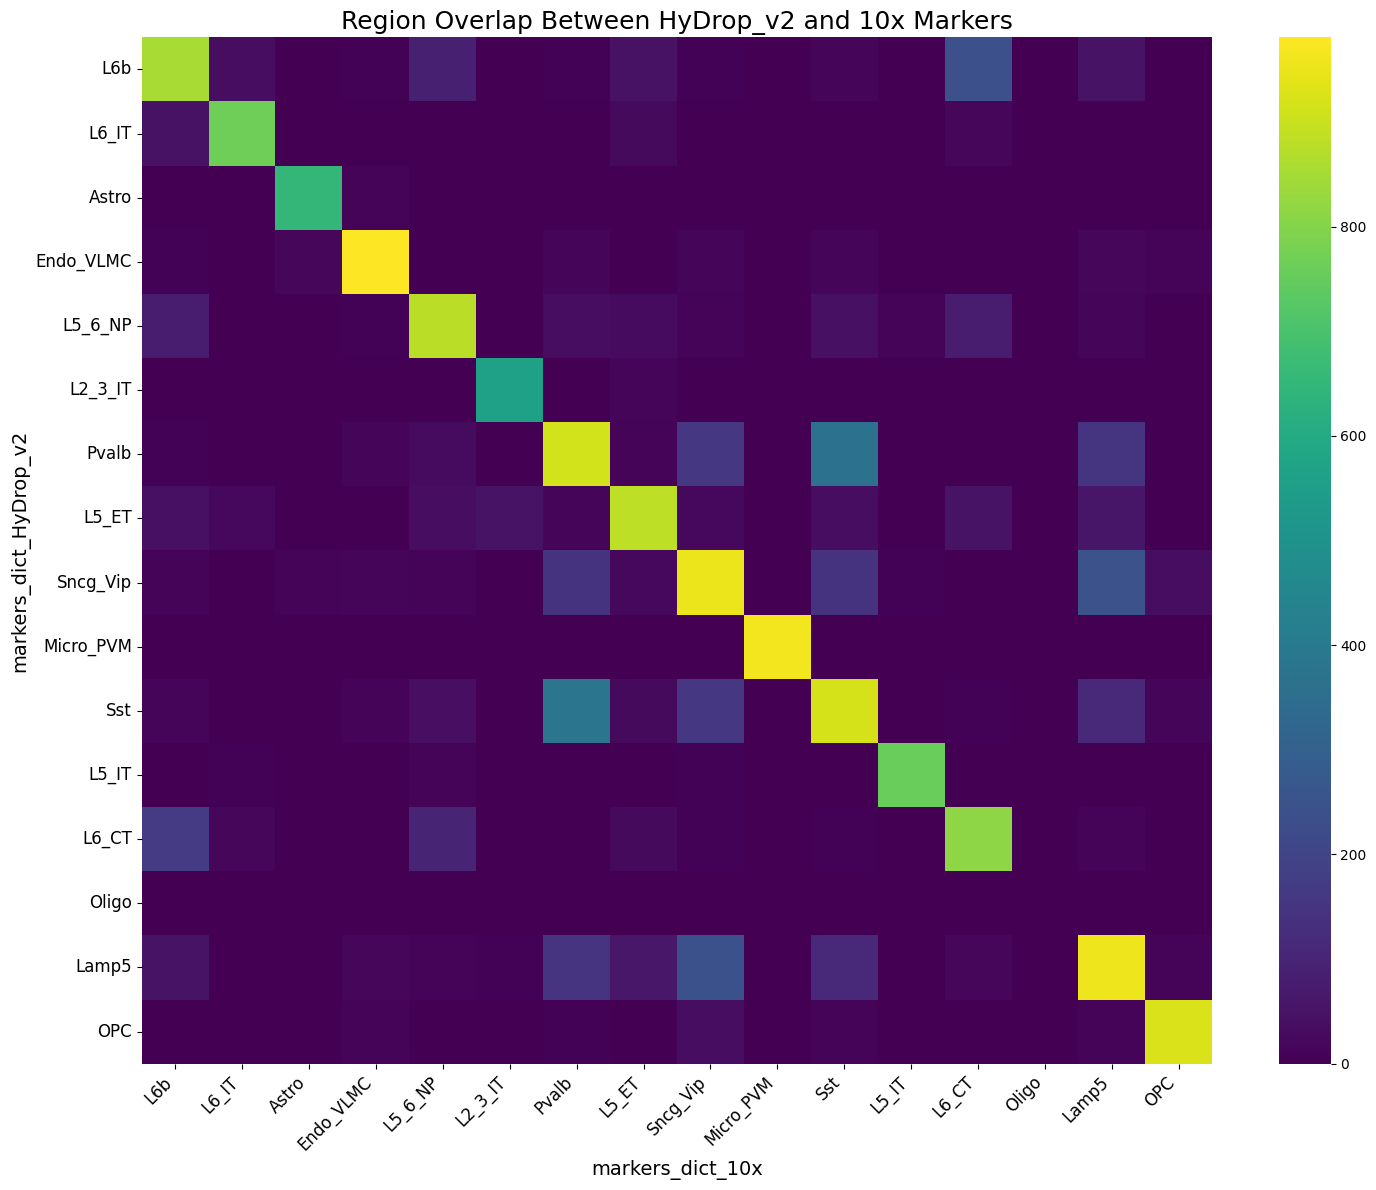

In [24]:
# Step 1: Find the overlapping keys between the two dictionaries
overlapping_keys = list(set(markers_dict_10x.keys()) & set(markers_dict_HyDrop_v2.keys()))

# Step 2: Filter the overlap_df to include only the overlapping keys
filtered_overlap_df = overlap_df.loc[overlapping_keys, overlapping_keys]

# Step 3: Plot the filtered DataFrame
plt.figure(figsize=(15, 12))
sns.heatmap(filtered_overlap_df, annot=False, cmap='viridis', cbar=True)
plt.title('Region Overlap Between HyDrop_v2 and 10x Markers', fontsize=18)
plt.xlabel('markers_dict_10x', fontsize=14)
plt.ylabel('markers_dict_HyDrop_v2', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlap
plt.show()

print and save percentage overlap of top 1000 DARs

In [25]:
percentage_overlap_df = overlap_df.copy()
for marker_HyDrop in overlap_df.index:
    total_regions_HyDrop = len(markers_dict_HyDrop_v2_filtered[marker_HyDrop])
    for marker_10x in overlap_df.columns:
        total_regions_10x = len(markers_dict_10x_filtered[marker_10x])
        max_regions = max(total_regions_HyDrop, total_regions_10x)
        if max_regions > 0:
            percentage_overlap_df.loc[marker_HyDrop, marker_10x] = (overlap_df.loc[marker_HyDrop, marker_10x] / max_regions)
        else:
            percentage_overlap_df.loc[marker_HyDrop, marker_10x] = 0

/tmp/ipykernel_1013028/214013749.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.65' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  percentage_overlap_df.loc[marker_HyDrop, marker_10x] = (overlap_df.loc[marker_HyDrop, marker_10x] / max_regions)
/tmp/ipykernel_1013028/214013749.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.009' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  percentage_overlap_df.loc[marker_HyDrop, marker_10x] = (overlap_df.loc[marker_HyDrop, marker_10x] / max_regions)
/tmp/ipykernel_1013028/214013749.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.003' has dtype incompatible with int64, please explicitly cast to a compatibl

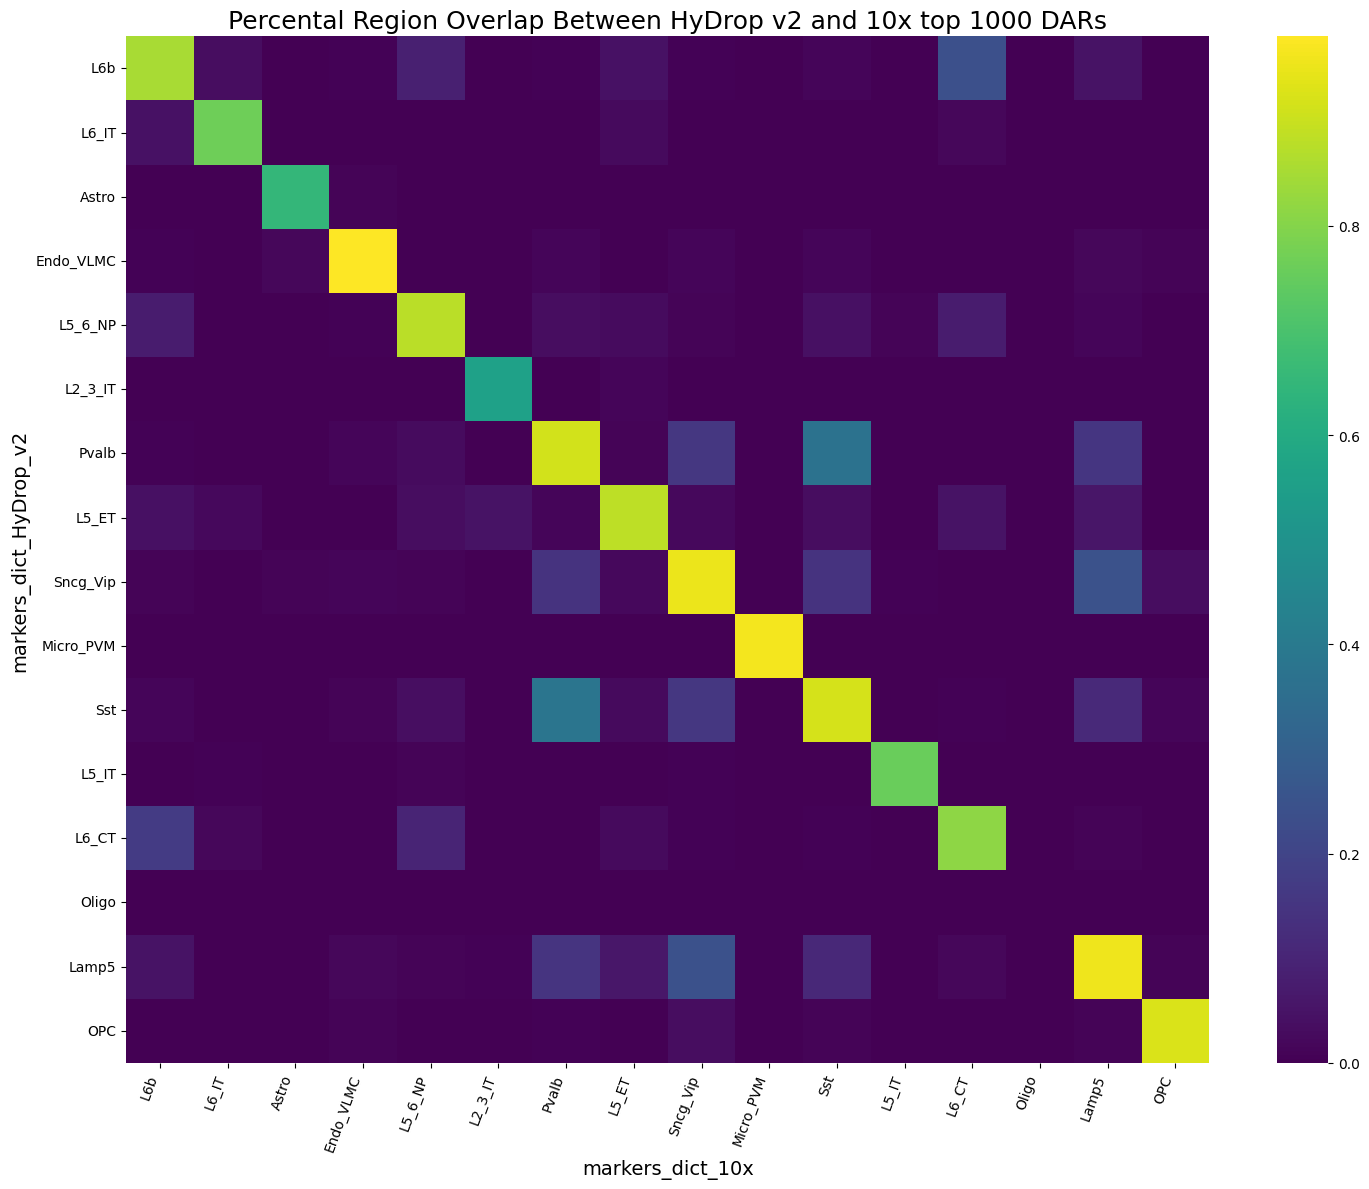

In [26]:
# Step 1: Find the overlapping keys between the two dictionaries
overlapping_keys = list(set(markers_dict_10x.keys()) & set(markers_dict_HyDrop_v2.keys()))

# Step 2: Filter the percentage_overlap_df to include only the overlapping keys
filtered_percentage_overlap_df = percentage_overlap_df.loc[overlapping_keys, overlapping_keys]

# Step 3: Plot the filtered DataFrame
plt.figure(figsize=(15, 12))
sns.heatmap(filtered_percentage_overlap_df, annot=False, cmap='viridis', cbar=True)
plt.title('Percental Region Overlap Between HyDrop v2 and 10x top 1000 DARs', fontsize=18)
plt.xlabel('markers_dict_10x', fontsize=14)
plt.ylabel('markers_dict_HyDrop_v2', fontsize=14)
plt.xticks(rotation=70, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlap

plt.savefig("Percent_Overlap_top1000_DARs_10x_HyDropv2.pdf", dpi=500)  # Save at 300 DPI for good quality
plt.show()


In [27]:
import numpy as np

# Create a dictionary of diagonal overlaps keyed by cell type
diagonal_dict = {cell_type: filtered_percentage_overlap_df.loc[cell_type, cell_type]
                 for cell_type in filtered_percentage_overlap_df.index}

# Sort the dictionary items by the overlap percentage in increasing order
sorted_diagonal = sorted(diagonal_dict.items(), key=lambda x: x[1])

print("Diagonal overlap percentages:")
for cell_type, overlap in sorted_diagonal:
    print(f"{cell_type}: {overlap * 100:.2f}%")

# Calculate and print the mean overlap (converted to percent)
mean_overlap = np.mean(list(diagonal_dict.values()))
print(f"\nMean diagonal overlap: {mean_overlap * 100:.2f}%")


Diagonal overlap percentages:
Oligo: 0.10%
L2_3_IT: 55.90%
Astro: 65.00%
L5_IT: 75.70%
L6_IT: 76.40%
L6_CT: 81.40%
L6b: 85.40%
L5_6_NP: 87.90%
L5_ET: 88.50%
Pvalb: 91.40%
Sst: 91.60%
OPC: 92.50%
Sncg_Vip: 95.40%
Lamp5: 95.70%
Micro_PVM: 96.40%
Endo_VLMC: 98.10%

Mean diagonal overlap: 79.84%


## HyDrop v1 vs 10x v2

In [43]:
overlap_df = pd.DataFrame(index=markers_dict_HyDrop_v1_filtered.keys(), columns=markers_dict_10x_filtered.keys(), data=0)

In [28]:
for marker_HyDrop, df_HyDrop in markers_dict_HyDrop_v1_filtered.items():
    regions_HyDrop = set(df_HyDrop.index)
    for marker_10x, df_10x in markers_dict_10x_filtered.items():
        regions_10x = set(df_10x.index)
        overlap_count = len(regions_HyDrop & regions_10x)
        overlap_df.loc[marker_HyDrop, marker_10x] = overlap_count

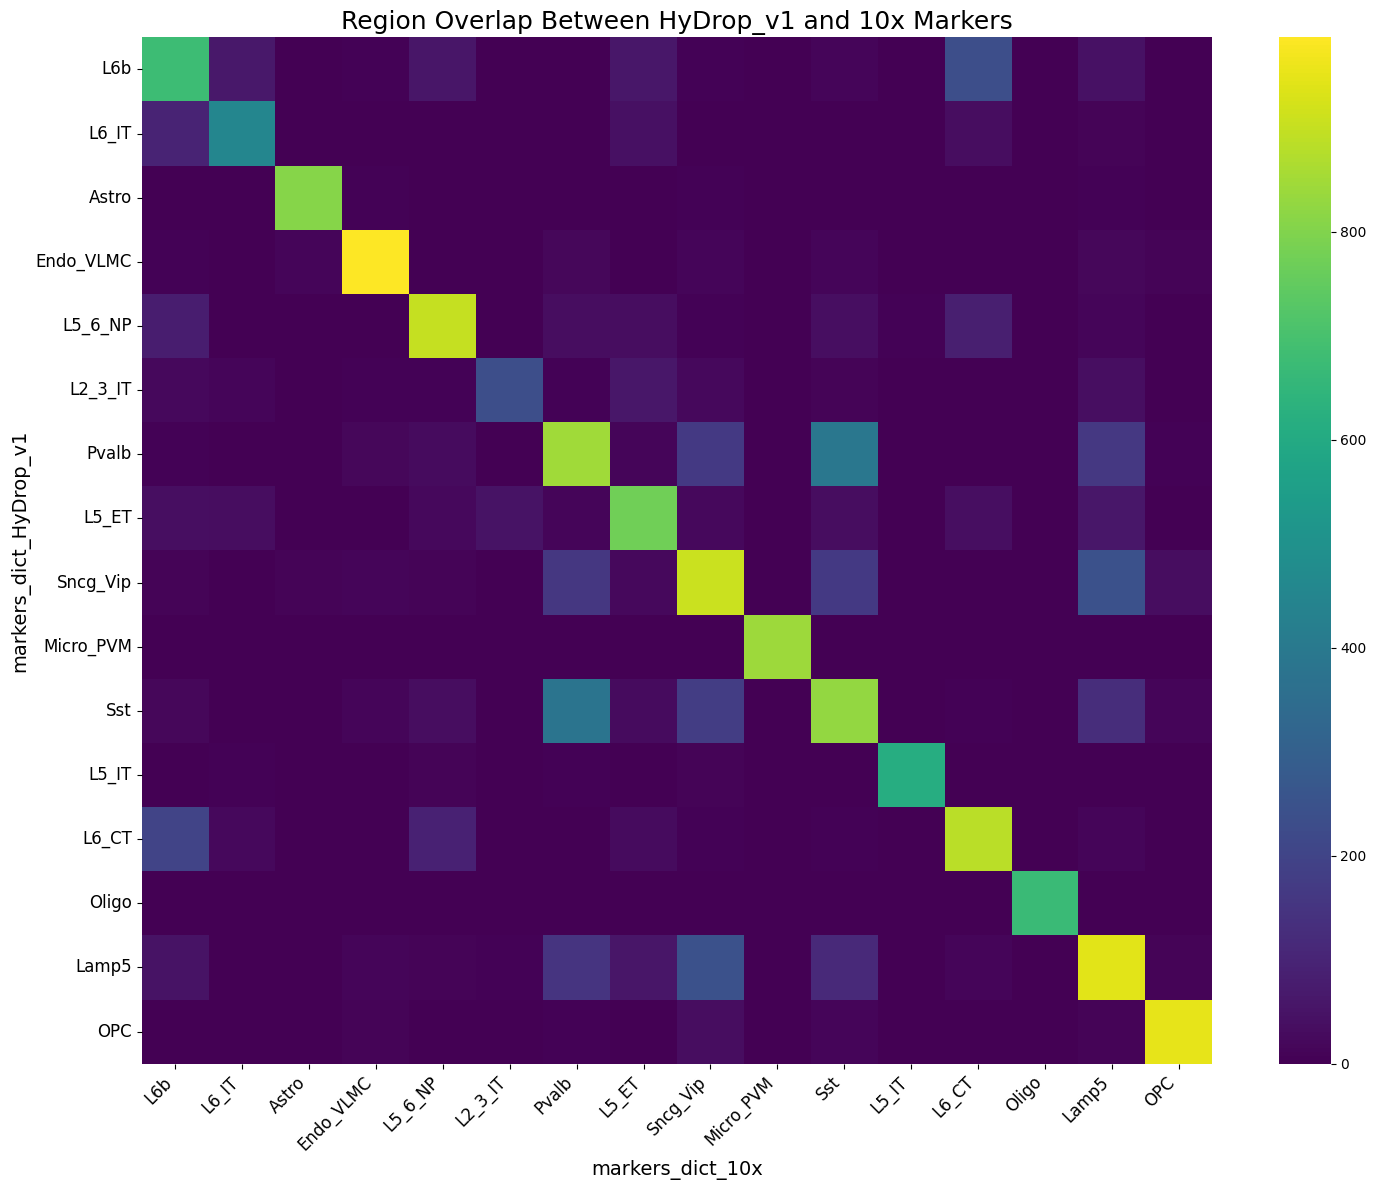

In [29]:
# Step 1: Find the overlapping keys between the two dictionaries
overlapping_keys = list(set(markers_dict_10x.keys()) & set(markers_dict_HyDrop_v1.keys()))

# Step 2: Filter the overlap_df to include only the overlapping keys
filtered_overlap_df = overlap_df.loc[overlapping_keys, overlapping_keys]

# Step 3: Plot the filtered DataFrame
plt.figure(figsize=(15, 12))
sns.heatmap(filtered_overlap_df, annot=False, cmap='viridis', cbar=True)
plt.title('Region Overlap Between HyDrop_v1 and 10x Markers', fontsize=18)
plt.xlabel('markers_dict_10x', fontsize=14)
plt.ylabel('markers_dict_HyDrop_v1', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlap
plt.show()

print and save percentage overlap of top 1000 DARs

In [30]:
percentage_overlap_df = overlap_df.copy()
for marker_HyDrop in overlap_df.index:
    total_regions_HyDrop = len(markers_dict_HyDrop_v1_filtered[marker_HyDrop])
    for marker_10x in overlap_df.columns:
        total_regions_10x = len(markers_dict_10x_filtered[marker_10x])
        max_regions = max(total_regions_HyDrop, total_regions_10x)
        if max_regions > 0:
            percentage_overlap_df.loc[marker_HyDrop, marker_10x] = (overlap_df.loc[marker_HyDrop, marker_10x] / max_regions)
        else:
            percentage_overlap_df.loc[marker_HyDrop, marker_10x] = 0

/tmp/ipykernel_1013028/2093222025.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.809' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  percentage_overlap_df.loc[marker_HyDrop, marker_10x] = (overlap_df.loc[marker_HyDrop, marker_10x] / max_regions)
/tmp/ipykernel_1013028/2093222025.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.007' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  percentage_overlap_df.loc[marker_HyDrop, marker_10x] = (overlap_df.loc[marker_HyDrop, marker_10x] / max_regions)
/tmp/ipykernel_1013028/2093222025.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.004' has dtype incompatible with int64, please explicitly cast to a compa

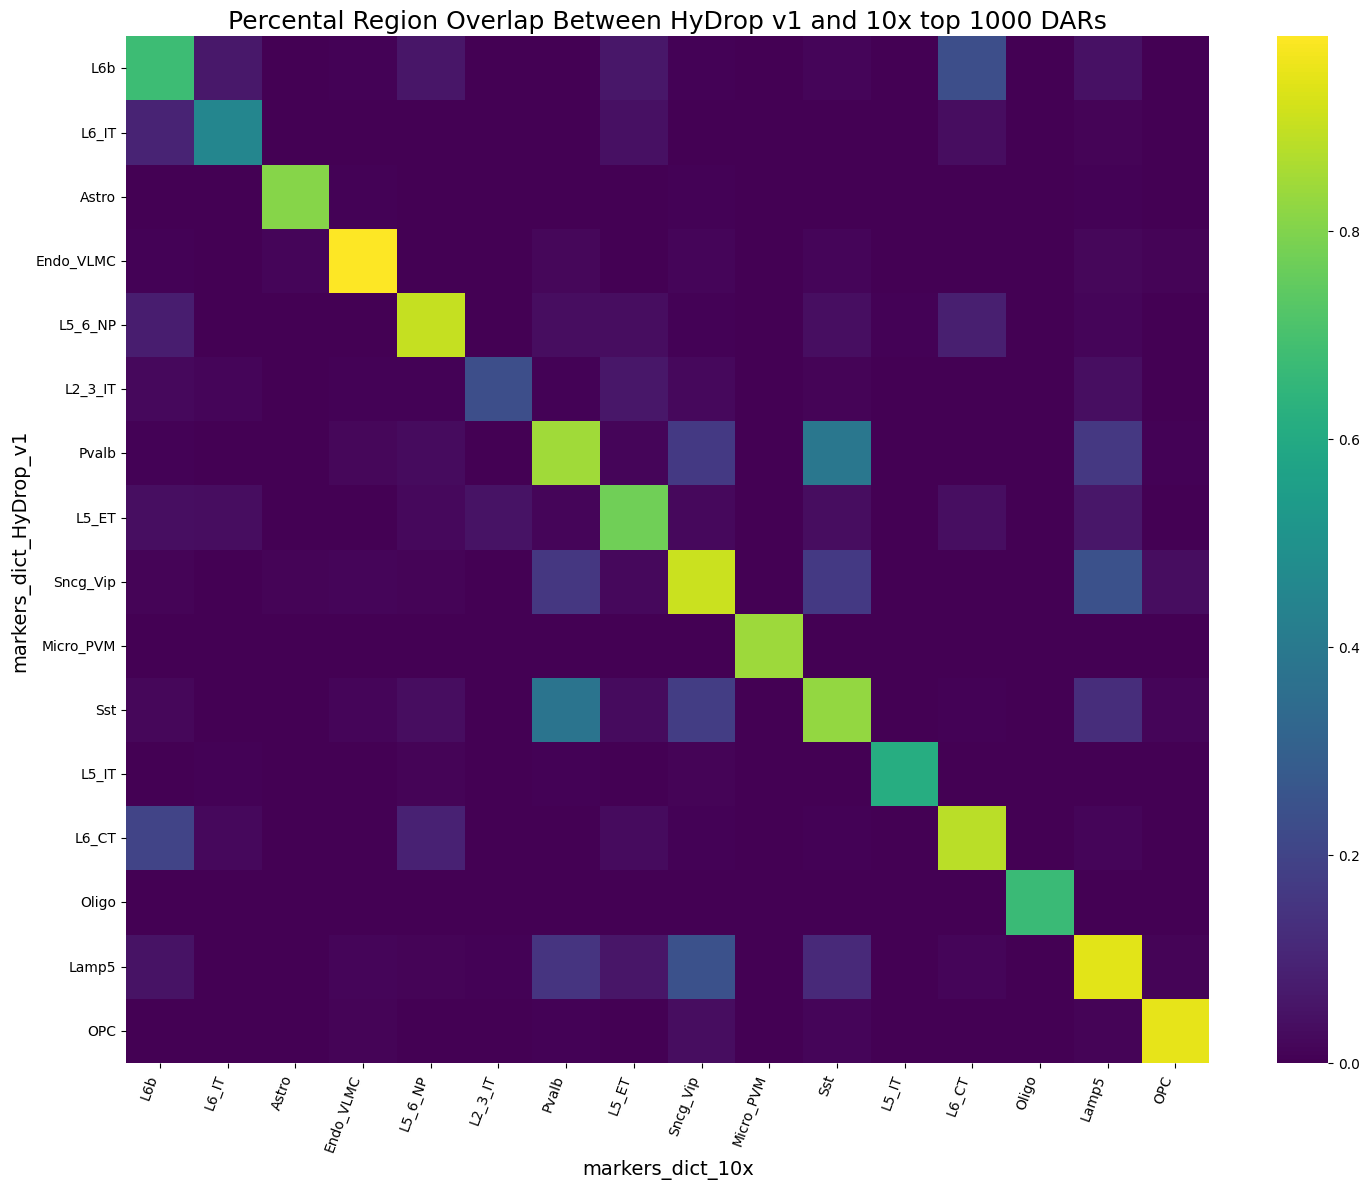

In [31]:
# Step 1: Find the overlapping keys between the two dictionaries
overlapping_keys = list(set(markers_dict_10x.keys()) & set(markers_dict_HyDrop_v1.keys()))

# Step 2: Filter the percentage_overlap_df to include only the overlapping keys
filtered_percentage_overlap_df = percentage_overlap_df.loc[overlapping_keys, overlapping_keys]

# Step 3: Plot the filtered DataFrame
plt.figure(figsize=(15, 12))
sns.heatmap(filtered_percentage_overlap_df, annot=False, cmap='viridis', cbar=True)
plt.title('Percental Region Overlap Between HyDrop v1 and 10x top 1000 DARs', fontsize=18)
plt.xlabel('markers_dict_10x', fontsize=14)
plt.ylabel('markers_dict_HyDrop_v1', fontsize=14)
plt.xticks(rotation=70, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlap

plt.savefig("Percent_Overlap_top1000_DARs_10xv2_HyDropv1.pdf", dpi=500)  # Save at 300 DPI for good quality
plt.show()


In [32]:
import numpy as np

# Create a dictionary of diagonal overlaps keyed by cell type
diagonal_dict = {cell_type: filtered_percentage_overlap_df.loc[cell_type, cell_type]
                 for cell_type in filtered_percentage_overlap_df.index}

# Sort the dictionary items by the overlap percentage in increasing order
sorted_diagonal = sorted(diagonal_dict.items(), key=lambda x: x[1])

print("Diagonal overlap percentages:")
for cell_type, overlap in sorted_diagonal:
    print(f"{cell_type}: {overlap * 100:.2f}%")

# Calculate and print the mean overlap (converted to percent)
mean_overlap = np.mean(list(diagonal_dict.values()))
print(f"\nMean diagonal overlap: {mean_overlap * 100:.2f}%")


Diagonal overlap percentages:
L2_3_IT: 23.20%
L6_IT: 45.20%
L5_IT: 61.40%
Oligo: 66.80%
L6b: 67.50%
L5_ET: 77.40%
Astro: 80.90%
Sst: 82.60%
Micro_PVM: 84.20%
Pvalb: 84.70%
L6_CT: 88.30%
L5_6_NP: 90.20%
Sncg_Vip: 90.70%
Lamp5: 94.40%
OPC: 95.20%
Endo_VLMC: 98.70%

Mean diagonal overlap: 76.96%


In [89]:
markers_dict_HyDrop_v2

{'Astro':                              Log2FC  Adjusted_pval           Contrast
 chr6:114188787-114189287   5.565684            0.0  HyDrop_v2___Astro
 chr11:96301808-96302308    5.485362            0.0  HyDrop_v2___Astro
 chr11:19523983-19524483    5.466035            0.0  HyDrop_v2___Astro
 chr12:77742686-77743186    5.453224            0.0  HyDrop_v2___Astro
 chr2:172823750-172824250   5.433807            0.0  HyDrop_v2___Astro
 ...                             ...            ...                ...
 chr3:89391162-89391662     0.585609            0.0  HyDrop_v2___Astro
 chr6:91736411-91736911     0.585589            0.0  HyDrop_v2___Astro
 chr13:48967908-48968408    0.585394            0.0  HyDrop_v2___Astro
 chr10:128376758-128377258  0.585203            0.0  HyDrop_v2___Astro
 chr7:16614545-16615045     0.585011            0.0  HyDrop_v2___Astro
 
 [17330 rows x 3 columns],
 'Astroependymal_NN':                             Log2FC  Adjusted_pval  \
 chr7:125643804-125644304  3.734675

In [91]:
Oligo = markers_dict_HyDrop_v2['Oligo'].iloc[:100]
Oligo[:20]

Log2FC  Adjusted_pval           Contrast
chr17:10455313-10455813    4.920649            0.0  HyDrop_v2___Oligo
chr4:117408472-117408972   4.919433            0.0  HyDrop_v2___Oligo
chr11:111513204-111513704  4.894222            0.0  HyDrop_v2___Oligo
chr11:46168307-46168807    4.893576            0.0  HyDrop_v2___Oligo
chr12:13304157-13304657    4.889839            0.0  HyDrop_v2___Oligo
chr7:119738808-119739308   4.882199            0.0  HyDrop_v2___Oligo
chr2:127625433-127625933   4.877213            0.0  HyDrop_v2___Oligo
chr2:162991918-162992418   4.872710            0.0  HyDrop_v2___Oligo
chr11:73284964-73285464    4.872472            0.0  HyDrop_v2___Oligo
chr7:130305212-130305712   4.869402            0.0  HyDrop_v2___Oligo
chr14:67919673-67920173    4.868523            0.0  HyDrop_v2___Oligo
chr7:129820206-129820706   4.863716            0.0  HyDrop_v2___Oligo
chr9:63926304-63926804     4.860512            0.0  HyDrop_v2___Oligo
chr9:25231771-25232271     4.859224            0.0  HyDrop_v2___Oligo
chr7:119727538-119728038   4.855901            0.0  HyDrop_v2___Oligo
chr4:117409044-117409544   4.854838            0.0  HyDrop_v2___Oligo
chr6:83282557-83283057     4.851302            0.0  HyDrop_v2___Oligo
chr9:59214411-59214911     4.850510            0.0  HyDrop_v2___Oligo
chr19:41072082-41072582    4.848762            0.0  HyDrop_v2___Oligo
chr19:5935232-5935732      4.848617            0.0  HyDrop_v2___Oligo

# pycistarget

In [36]:
sample_counts = cistopic_obj.cell_data['cleaned_up_annot'].value_counts().to_dict()
print(sample_counts)

{'Oligo': 18861, 'L2_3_IT': 13266, 'L5_IT': 11656, 'L6_CT': 7784, 'L6_IT': 7306, 'Astro': 7015, 'Micro_PVM': 5906, 'OPC': 4419, 'Pvalb': 3914, 'L5_ET': 2701, 'Sst': 2327, 'Sncg_Vip': 1848, 'L5_6_NP': 1562, 'Lamp5': 1517, 'L6b': 1291, 'Endo_VLMC': 990}


In [35]:
cistopic_obj.cell_data.columns

Index(['Unique_nr_frag', 'Total_nr_frag_in_regions', 'beads', 'barcode',
       'cisTopic_log_nr_acc', 'Dupl_nr_frag',
       'preliminary_mouse_annot_23072024', 'pycisTopic_leiden_10_0.6',
       'tech_simple', 'pycisTopic_leiden_10_2', 'sample_prep',
       'Zu_paper_lift_over_simple', 'FRIP',
       'kde__log_Unique_nr_frag_in_regions__TSS_enrichment',
       'Unique_nr_frag_in_regions', 'Dupl_rate', 'refined_annot',
       'refined_annot_simple', 'kde__log_Unique_nr_frag_in_regions__Dupl_rate',
       'cisTopic_log_nr_frag', 'pycisTopic_leiden_10_1.2', 'cisTopic_nr_frag',
       'dict_BICCN_corrected_08112024', 'region_label',
       'Doublet_scores_fragments', 'Zu_paper_lift_over',
       'kde__log_Unique_nr_frag_in_regions__FRIP', 'cisTopic_nr_acc',
       'sample_id', 'techxZu_paper_lift_over_simple', 'tech', 'TSS_enrichment',
       'Predicted_doublets_fragments', 'Total_nr_frag', 'Log_unique_nr_frag',
       'Log_total_nr_frag', 'pycisTopic_leiden_10_2.5', 'cleaned_up_annot',


In [42]:
hydropv2_dir = "/lustre1/project/stg_00002/lcb/hydrop_v2_paper/revision/mcortex/cistopic/pycistarget/bed_celltype_HyDrop_v2_top1k_DARs"
hydropv1_dir = "/lustre1/project/stg_00002/lcb/hydrop_v2_paper/revision/mcortex/cistopic/pycistarget/bed_celltype_HyDrop_v1_top1k_DARs"
tenx_dir = "/lustre1/project/stg_00002/lcb/hydrop_v2_paper/revision/mcortex/cistopic/pycistarget/bed_celltype_10x_top1k_DARs"

colors = { 'Oligo': '#CC79A7',         # unchanged
    'L2_3_IT': '#E69F00',       # unchanged
    'L6_CT': '#0072B2',         # changed from yellow to strong blue
    'L4_IT': '#009E73',         # changed from dark blue to teal
    'Astro': '#D55E00',         # unchanged
    'Micro_PVM': '#000000',     # unchanged
    'OPC': '#332288',           # deep indigo
    'L6_IT': '#117733',         # dark green
    'Pvalb': '#882255',         # dark red
    'L5_ET': '#44AA99',         # medium teal
    'L5_6_NP': '#AA4499',       # purple pink
    'L5_IT': '#DDCC77',         # soft yellow
    'Sst': '#CC6677',           # soft red
    'Lamp5': '#88CCEE',         # light blue
    'L6b': '#999933',           # olive green
    'Sncg_Vip': '#1177BB',      # same as Pvalb for now, adjust if needed
    'Endo_VLMC': '#994F00', }

In [43]:
def extract_nes_scores(directory):
    nes_scores = {}
    for filename in os.listdir(directory):
        if filename.endswith(".tsv"):
            # Read the TSV file
            df = pd.read_csv(os.path.join(directory, filename), sep='\t', index_col=0)
            for _, row in df.iterrows():
                motif = row.name  # Motif information is in the index
                region_set = row['Region_set']  # Cell type information in the 'Region_set' column
                nes = row['NES']  # NES score

                if region_set not in nes_scores:
                    nes_scores[region_set] = {}
                nes_scores[region_set][motif] = nes
    return nes_scores


In [44]:
nes_scores_hydrop_v2 = extract_nes_scores(hydropv2_dir)
nes_scores_hydrop_v1 = extract_nes_scores(hydropv1_dir)
nes_scores_10x = extract_nes_scores(tenx_dir)

In [45]:
nes_scores_hydrop_v2

{'Sst': {'metacluster_177.6': 10.433204970047424,
  'cisbp__M00756': 7.751478243300934,
  'hdpi__MYF6': 7.43015578053418,
  'transfac_pro__M09767': 6.426749125435951,
  'metacluster_70.7': 6.415992961763775,
  'hocomoco__HXD8_HUMAN.H11MO.0.D': 6.405165090333788,
  'dbtfbs__TCF12_representative_N1': 6.124357510732224,
  'transfac_pro__M00927': 6.050641935698923,
  'swissregulon__mm__Nhlh1': 6.010844130111878,
  'transfac_pro__M02101': 5.832793767458486,
  'transfac_pro__M03831': 5.707807145587822,
  'metacluster_142.4': 5.691170945774858,
  'metacluster_70.8': 5.593074733084629,
  'metacluster_70.1': 5.5460344439583205,
  'metacluster_184.52': 5.486588712730104,
  'transfac_public__M00136': 5.481927708472162,
  'metacluster_145.3': 5.4257088263455975,
  'metacluster_149.4': 5.318792559444185,
  'metacluster_184.9': 5.311478368147107,
  'transfac_pro__M01716': 5.182045865291943,
  'transfac_pro__M02018': 5.06745686830438,
  'homer__NAHCAGCTGD_Ap4': 5.0364791169285175,
  'metacluster_76.2

## HyDrop v2 vs 10x v2

In [46]:
plt.scatter(x_vals, y_vals, label=cell_type, 
            color=colors.get(cell_type, '#333333'),
            alpha=0.7, s=50, marker='o', edgecolors='none')


NameError: name 'x_vals' is not defined

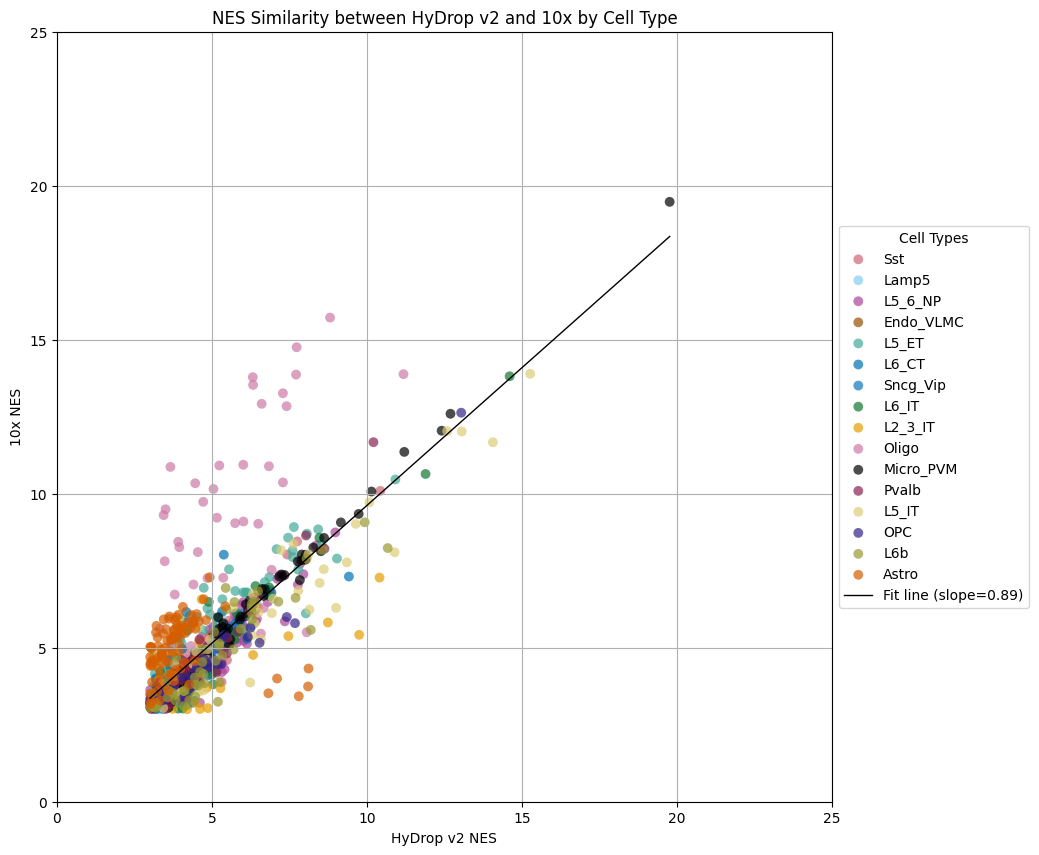

In [50]:
plt.figure(figsize=(10, 10))

all_x_vals = []
all_y_vals = []

for cell_type in nes_scores_hydrop_v2:
    if cell_type in nes_scores_10x:
        x_vals = []
        y_vals = []
        for motif in nes_scores_hydrop_v2[cell_type]:
            if motif in nes_scores_10x[cell_type]:
                x_vals.append(nes_scores_hydrop_v2[cell_type][motif])
                y_vals.append(nes_scores_10x[cell_type][motif])

        all_x_vals.extend(x_vals)
        all_y_vals.extend(y_vals)

        plt.scatter(x_vals, y_vals, label=cell_type, color=colors.get(cell_type, '#333333'), alpha=0.7, s=50, marker='o', edgecolors='none')


# Calculate the linear fit
slope, intercept = np.polyfit(all_x_vals, all_y_vals, 1)
x_fit = np.array([min(all_x_vals), max(all_x_vals)])
y_fit = slope * x_fit + intercept

# Plot the linear fit line
plt.plot(x_fit, y_fit, color='black', linestyle='-', linewidth=1, label=f'Fit line (slope={slope:.2f})')

plt.xlabel('HyDrop v2 NES')
plt.ylabel('10x NES')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.title('NES Similarity between HyDrop v2 and 10x by Cell Type')
plt.legend(title="Cell Types", loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium', title_fontsize='medium')
plt.grid(True)
plt.savefig("NES_correlation_per_celltype_top1000_DARs_10xv2_HyDropv2.pdf", dpi=500, bbox_inches='tight', pad_inches=0.2)  # Save at 300 DPI for good quality
plt.show()

In [51]:
def extract_nes_scores(directory):
    nes_scores = {}
    annotations = {}
    for filename in os.listdir(directory):
        if filename.endswith(".tsv"):
            # Read the TSV file
            df = pd.read_csv(os.path.join(directory, filename), sep='\t', index_col=0)
            for _, row in df.iterrows():
                motif = row.name  # Motif information is in the index
                region_set = row['Region_set']  # Cell type information in the 'Region_set' column
                nes = row['NES']  # NES score
                direct_annot = row['Direct_annot']  # Direct annotation

                if region_set not in nes_scores:
                    nes_scores[region_set] = {}
                    annotations[region_set] = {}
                
                nes_scores[region_set][motif] = nes
                annotations[region_set][motif] = direct_annot
    return nes_scores, annotations

In [52]:
nes_scores_hydrop_v2, annotations_hydrop_v2 = extract_nes_scores(hydropv2_dir)
nes_scores_hydrop_v1, annotations_hydrop_v1 = extract_nes_scores(hydropv1_dir)
nes_scores_10x, annotations_10x = extract_nes_scores(tenx_dir)

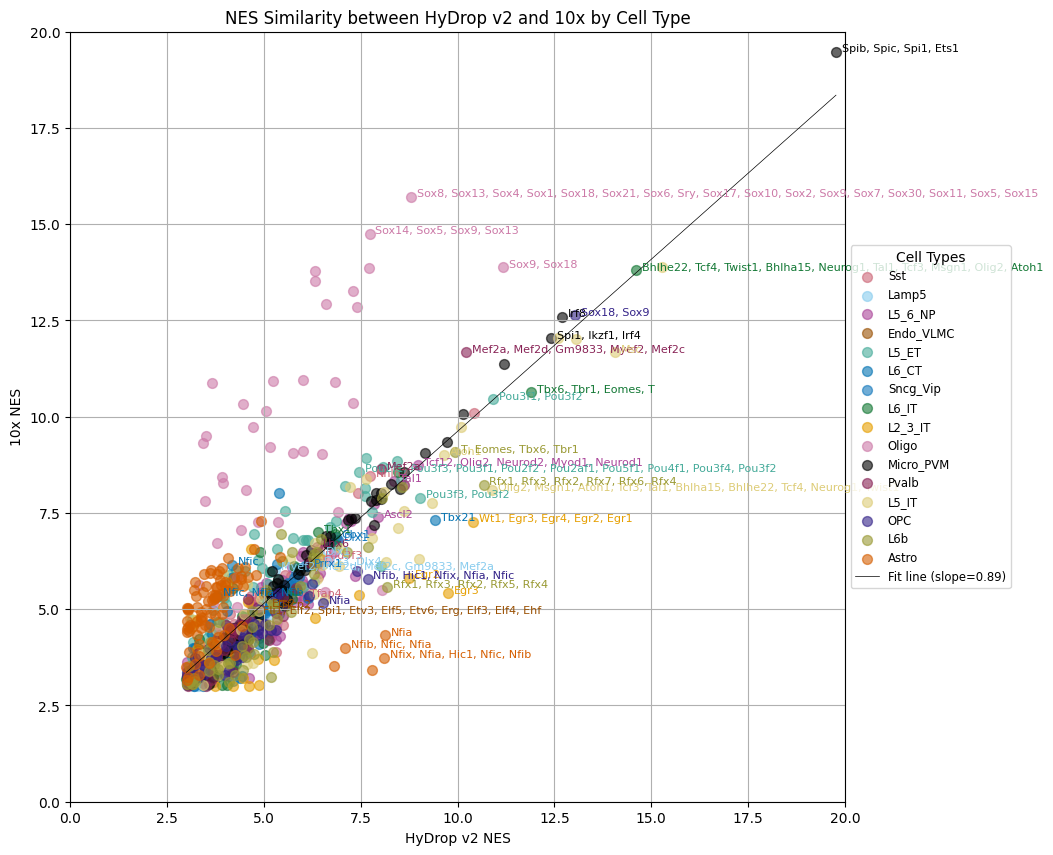

In [56]:
plt.figure(figsize=(10, 10))

all_x_vals = []
all_y_vals = []

# Define the offset (2 mm converted to data units)
offset = 0.15  # You may need to adjust this depending on the scale of your data

for cell_type in nes_scores_hydrop_v2:
    if cell_type in nes_scores_10x:
        # Extract data for scatter plot
        x_vals = []
        y_vals = []
        motifs = []
        direct_annots = []
        for motif in nes_scores_hydrop_v2[cell_type]:
            if motif in nes_scores_10x[cell_type]:
                x_vals.append(nes_scores_hydrop_v2[cell_type][motif])
                y_vals.append(nes_scores_10x[cell_type][motif])
                motifs.append(motif)
                direct_annots.append(annotations_hydrop_v2[cell_type][motif])

        all_x_vals.extend(x_vals)
        all_y_vals.extend(y_vals)

        plt.scatter(x_vals, y_vals, label=cell_type, color=colors.get(cell_type, '#333333'), alpha=0.6, s=50)

        # Filter out NaN annotations
        valid_indices = [i for i in range(len(direct_annots)) if pd.notna(direct_annots[i])]

        # Select the top 3 motifs based on NES score for annotation
        if len(valid_indices) > 0:
            top_10_indices = sorted(valid_indices, key=lambda i: max(x_vals[i], y_vals[i]), reverse=True)[:3]
            for i in top_10_indices:
                plt.text(x_vals[i] + offset, y_vals[i], direct_annots[i], fontsize=8, color=colors.get(cell_type, '#333333'), alpha=1)

# Calculate the linear fit
slope, intercept = np.polyfit(all_x_vals, all_y_vals, 1)
x_fit = np.array([min(all_x_vals), max(all_x_vals)])
y_fit = slope * x_fit + intercept

# Plot the linear fit line
plt.plot(x_fit, y_fit, color='black', linestyle='-', linewidth=0.5, label=f'Fit line (slope={slope:.2f})')

# Customize the plot
plt.xlabel('HyDrop v2 NES')
plt.ylabel('10x NES')
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.title('NES Similarity between HyDrop v2 and 10x by Cell Type')
plt.legend(title="Cell Types", loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', title_fontsize='medium')
plt.grid(True)

# Save the plot with adjustments to avoid cutting off the legend
plt.savefig("NES_correlation_per_celltype_top1000_DARs_10x_HyDrop_v2_top_3TFs_added.pdf", dpi=300, bbox_inches='tight', pad_inches=0.2)

# Show the plot
plt.show()

## HyDrop v1 vs 10x v2

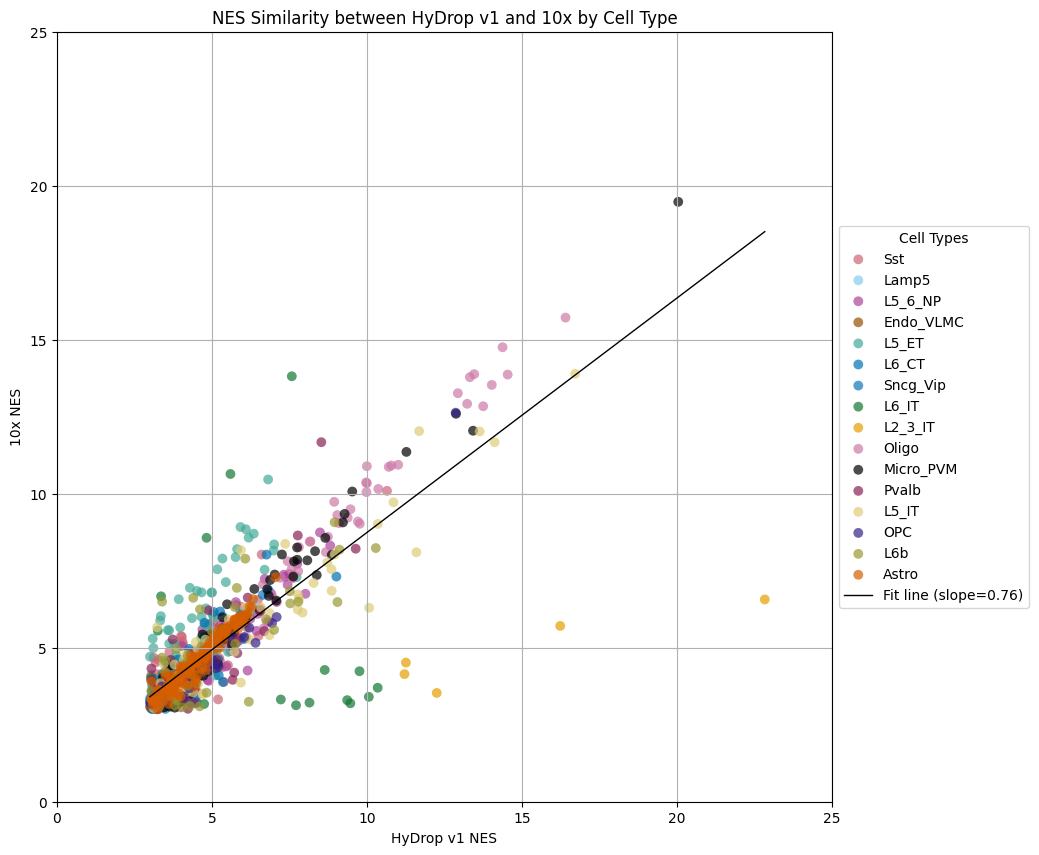

In [53]:
plt.figure(figsize=(10, 10))

all_x_vals = []
all_y_vals = []

for cell_type in nes_scores_hydrop_v1:
    if cell_type in nes_scores_10x:
        x_vals = []
        y_vals = []
        for motif in nes_scores_hydrop_v1[cell_type]:
            if motif in nes_scores_10x[cell_type]:
                x_vals.append(nes_scores_hydrop_v1[cell_type][motif])
                y_vals.append(nes_scores_10x[cell_type][motif])

        all_x_vals.extend(x_vals)
        all_y_vals.extend(y_vals)

        plt.scatter(x_vals, y_vals, label=cell_type, color=colors.get(cell_type, '#333333'), alpha=0.7, s=50, marker='o', edgecolors='none')


# Calculate the linear fit
slope, intercept = np.polyfit(all_x_vals, all_y_vals, 1)
x_fit = np.array([min(all_x_vals), max(all_x_vals)])
y_fit = slope * x_fit + intercept

# Plot the linear fit line
plt.plot(x_fit, y_fit, color='black', linestyle='-', linewidth=1, label=f'Fit line (slope={slope:.2f})')

plt.xlabel('HyDrop v1 NES')
plt.ylabel('10x NES')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.title('NES Similarity between HyDrop v1 and 10x by Cell Type')
plt.legend(title="Cell Types", loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium', title_fontsize='medium')
plt.grid(True)
plt.savefig("NES_correlation_per_celltype_top1000_DARs_10xv2_HyDropv1.pdf", dpi=500, bbox_inches='tight', pad_inches=0.2)  # Save at 300 DPI for good quality
plt.show()

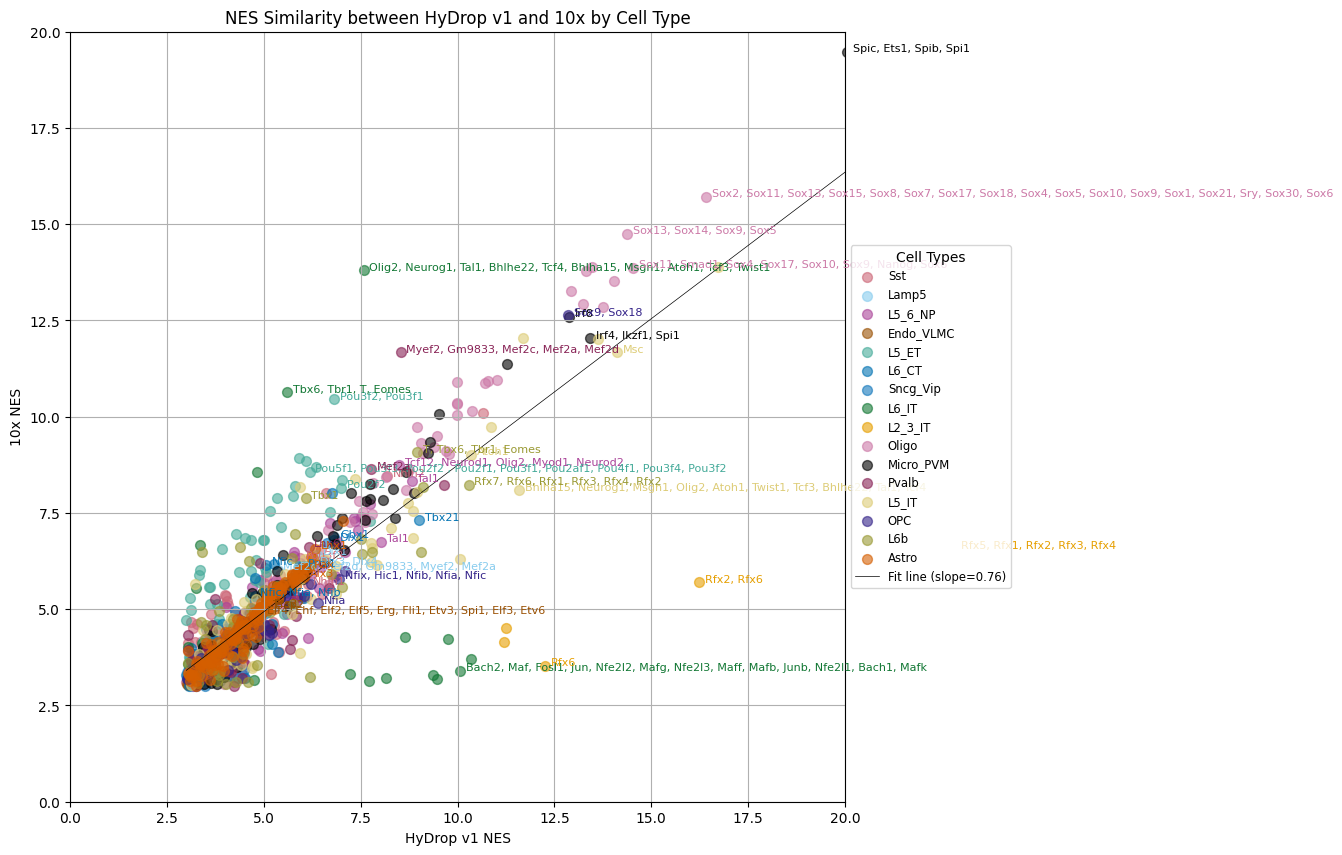

In [57]:
plt.figure(figsize=(10, 10))

all_x_vals = []
all_y_vals = []

# Define the offset (2 mm converted to data units)
offset = 0.15  # You may need to adjust this depending on the scale of your data

for cell_type in nes_scores_hydrop_v1:
    if cell_type in nes_scores_10x:
        # Extract data for scatter plot
        x_vals = []
        y_vals = []
        motifs = []
        direct_annots = []
        for motif in nes_scores_hydrop_v1[cell_type]:
            if motif in nes_scores_10x[cell_type]:
                x_vals.append(nes_scores_hydrop_v1[cell_type][motif])
                y_vals.append(nes_scores_10x[cell_type][motif])
                motifs.append(motif)
                direct_annots.append(annotations_hydrop_v1[cell_type][motif])

        all_x_vals.extend(x_vals)
        all_y_vals.extend(y_vals)

        plt.scatter(x_vals, y_vals, label=cell_type, color=colors.get(cell_type, '#333333'), alpha=0.6, s=50)

        # Filter out NaN annotations
        valid_indices = [i for i in range(len(direct_annots)) if pd.notna(direct_annots[i])]

        # Select the top 3 motifs based on NES score for annotation
        if len(valid_indices) > 0:
            top_10_indices = sorted(valid_indices, key=lambda i: max(x_vals[i], y_vals[i]), reverse=True)[:3]
            for i in top_10_indices:
                plt.text(x_vals[i] + offset, y_vals[i], direct_annots[i], fontsize=8, color=colors.get(cell_type, '#333333'), alpha=1)

# Calculate the linear fit
slope, intercept = np.polyfit(all_x_vals, all_y_vals, 1)
x_fit = np.array([min(all_x_vals), max(all_x_vals)])
y_fit = slope * x_fit + intercept

# Plot the linear fit line
plt.plot(x_fit, y_fit, color='black', linestyle='-', linewidth=0.5, label=f'Fit line (slope={slope:.2f})')

# Customize the plot
plt.xlabel('HyDrop v1 NES')
plt.ylabel('10x NES')
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.title('NES Similarity between HyDrop v1 and 10x by Cell Type')
plt.legend(title="Cell Types", loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', title_fontsize='medium')
plt.grid(True)

# Save the plot with adjustments to avoid cutting off the legend
plt.savefig("NES_correlation_per_celltype_top1000_DARs_10x_HyDrop_v1_top_3TFs_added.pdf", dpi=300, bbox_inches='tight', pad_inches=0.2)

# Show the plot
plt.show()

In [58]:
# Get the keys from both dictionaries
keys_HyDrop_v2 = set(markers_dict_HyDrop_v2.keys())
keys_HyDrop_v1 = set(markers_dict_HyDrop_v1.keys())
keys_10x = set(markers_dict_10x.keys())

# Find the overlap between the two sets of keys
overlapping_keys = keys_HyDrop_v2.intersection(keys_10x, keys_HyDrop_v1)

# Print the results
print("Overlapping keys:")
print(overlapping_keys)

Overlapping keys:
{'L6b', 'L6_IT', 'Astro', 'Endo_VLMC', 'L5_6_NP', 'L2_3_IT', 'Pvalb', 'L5_ET', 'Sncg_Vip', 'Micro_PVM', 'Sst', 'L5_IT', 'L6_CT', 'Oligo', 'Lamp5', 'OPC'}


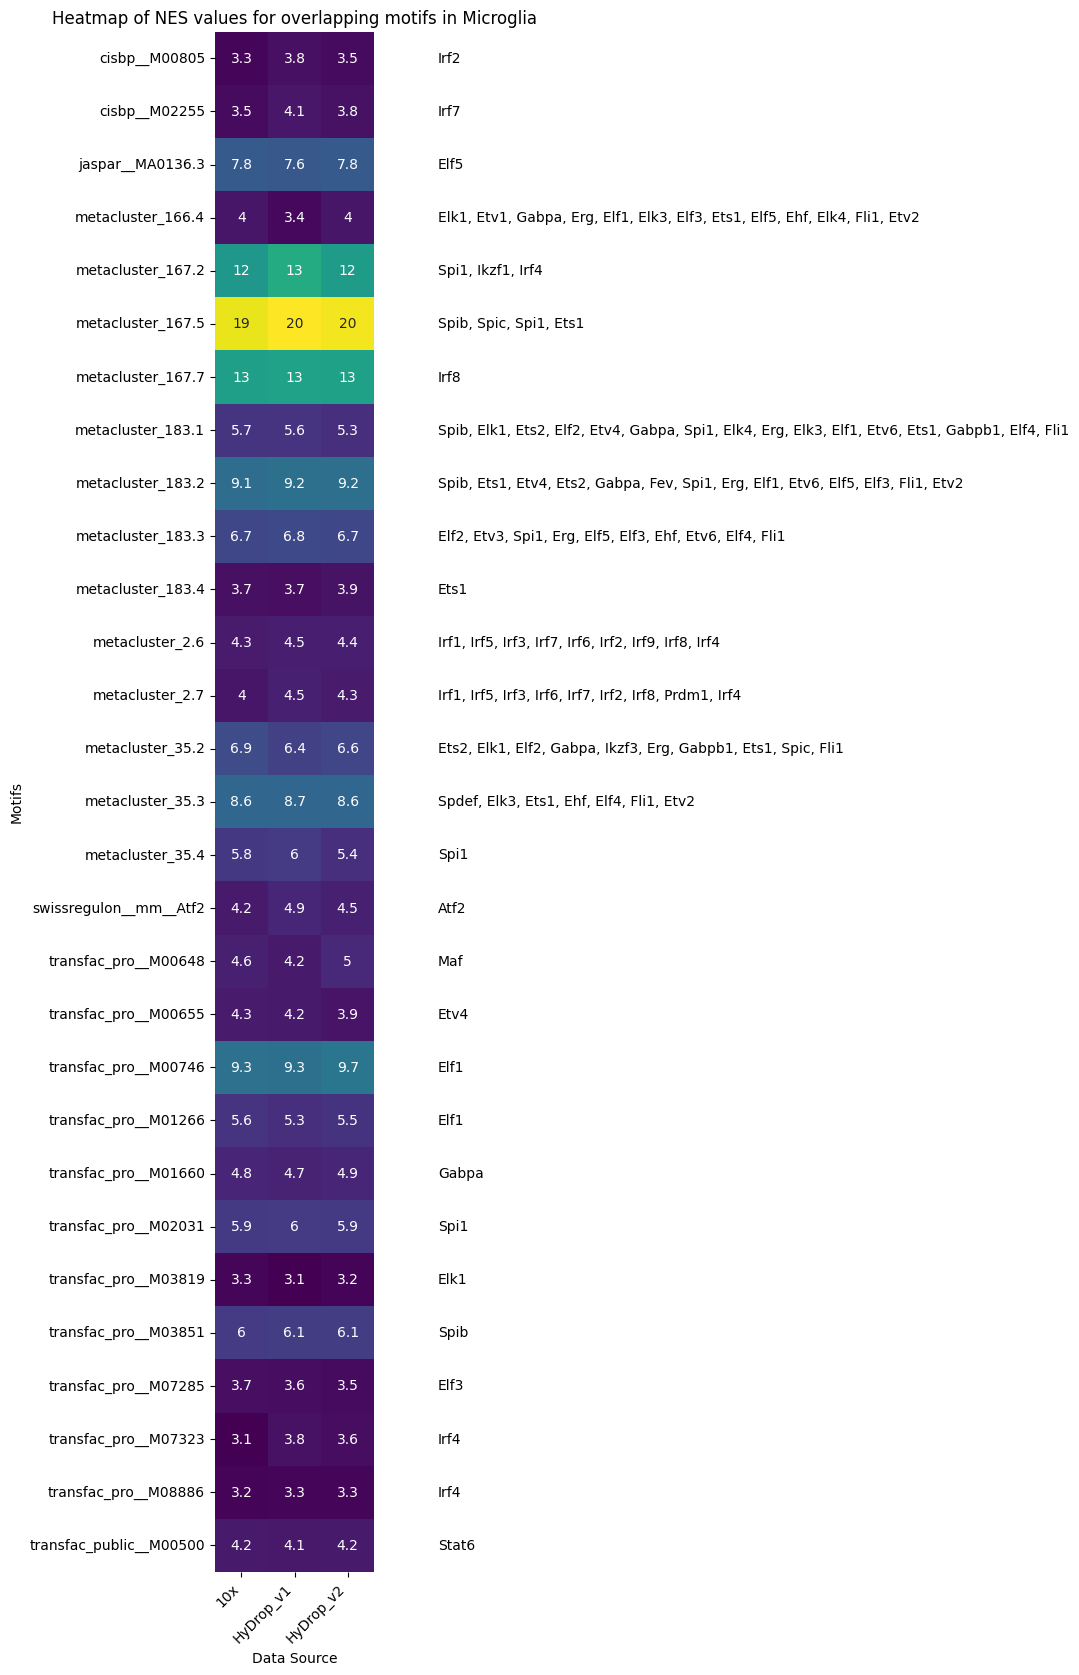

In [63]:
# Define the specific Region_set we are interested in
region_set = 'Micro_PVM'

# Extract motifs for the specific Region_set from all four datasets
motifs_hydrop_v2 = set(nes_scores_hydrop_v2.get(region_set, {}).keys())
motifs_hydrop_v1 = set(nes_scores_hydrop_v1.get(region_set, {}).keys())
motifs_10x = set(nes_scores_10x.get(region_set, {}).keys())


overlapping_motifs = motifs_hydrop_v2 & motifs_hydrop_v1 & motifs_10x

# Initialize a DataFrame to store NES values and annotations
heatmap_data = pd.DataFrame(index=sorted(overlapping_motifs), columns=['10x', 'HyDrop_v1', 'HyDrop_v2'])
annotations = pd.DataFrame(index=sorted(overlapping_motifs), columns=['Direct_annot'])

# Populate the DataFrames with NES values and annotations
for motif in overlapping_motifs:
    heatmap_data.loc[motif, '10x'] = nes_scores_10x[region_set].get(motif, float('nan'))
    heatmap_data.loc[motif, 'HyDrop_v1'] = nes_scores_hydrop_v1[region_set].get(motif, float('nan'))
    heatmap_data.loc[motif, 'HyDrop_v2'] = nes_scores_hydrop_v2[region_set].get(motif, float('nan'))
    annotations.loc[motif, 'Direct_annot'] = annotations_hydrop_v2[region_set].get(motif, float('nan'))

# Filter out rows where Direct_annot is NaN
valid_annotations = annotations.dropna()

# Keep only those motifs in the heatmap_data
heatmap_data_filtered = heatmap_data.loc[valid_annotations.index]

# Convert the DataFrame to float
heatmap_data_filtered = heatmap_data_filtered.astype(float)

# Plot the heatmap without the color bar (legend)
fig, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(heatmap_data_filtered, annot=True, cmap='viridis', cbar=False, square=True, ax=ax)
plt.title('Heatmap of NES values for overlapping motifs in Microglia')
plt.xlabel('Data Source')
plt.ylabel('Motifs')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Add the annotations as a separate text column
for i, motif in enumerate(heatmap_data_filtered.index):
    annot_text = valid_annotations.loc[motif, 'Direct_annot']
    ax.text(4.2, i + 0.5, annot_text, va='center', ha='left', fontsize=10, color='black')

plt.savefig("NES_heatmap_top1000_DARs_10x_HyDrop_MGL.png", dpi=500, bbox_inches='tight', pad_inches=0.2)

plt.show()

In [64]:
from scipy.stats import f_oneway
import pandas as pd
anova_results = f_oneway(
    heatmap_data_filtered['10x'],
    heatmap_data_filtered['HyDrop_v1'],
    heatmap_data_filtered['HyDrop_v2']
)

# Display the results
anova_output = pd.DataFrame({
    'Statistic': [anova_results.statistic],
    'p-Value': [anova_results.pvalue]
})

print("ANOVA Results:")
print(anova_output)

ANOVA Results:
   Statistic   p-Value
0   0.008899  0.991141


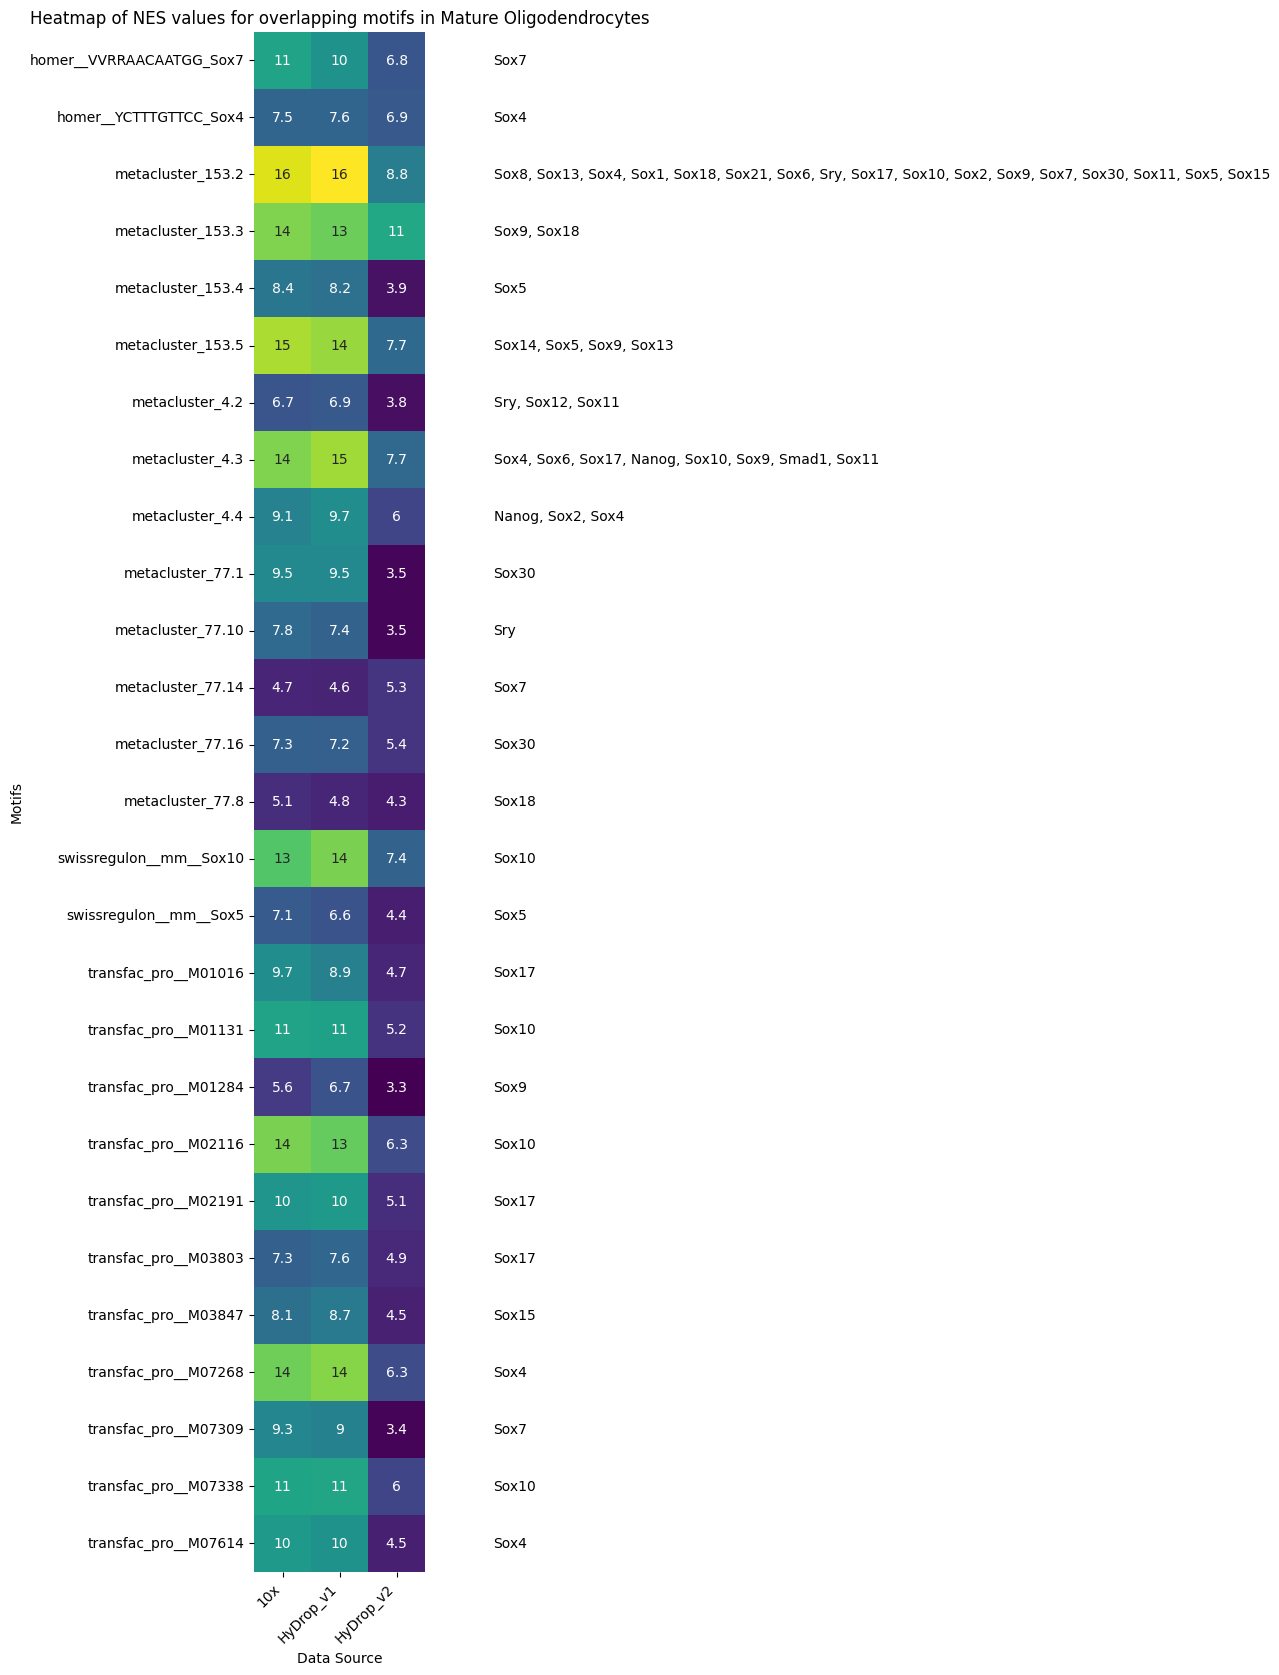

In [66]:
# Define the specific Region_set we are interested in
region_set = 'Oligo'

# Extract motifs for the specific Region_set from all four datasets
motifs_hydrop_v2 = set(nes_scores_hydrop_v2.get(region_set, {}).keys())
motifs_hydrop_v1 = set(nes_scores_hydrop_v1.get(region_set, {}).keys())
motifs_10x = set(nes_scores_10x.get(region_set, {}).keys())

# Find the intersection of the four sets (overlapping motifs)
overlapping_motifs = motifs_hydrop_v2 & motifs_hydrop_v1 & motifs_10x

# Initialize a DataFrame to store NES values and annotations
heatmap_data = pd.DataFrame(index=sorted(overlapping_motifs), columns=['10x', 'HyDrop_v1', 'HyDrop_v2'])
annotations = pd.DataFrame(index=sorted(overlapping_motifs), columns=['Direct_annot'])

# Populate the DataFrames with NES values and annotations
for motif in overlapping_motifs:
    heatmap_data.loc[motif, '10x'] = nes_scores_10x[region_set].get(motif, float('nan'))
    heatmap_data.loc[motif, 'HyDrop_v1'] = nes_scores_hydrop_v1[region_set].get(motif, float('nan'))
    heatmap_data.loc[motif, 'HyDrop_v2'] = nes_scores_hydrop_v2[region_set].get(motif, float('nan'))
    annotations.loc[motif, 'Direct_annot'] = annotations_hydrop_v2[region_set].get(motif, float('nan'))

# Filter out rows where Direct_annot is NaN
valid_annotations = annotations.dropna()

# Keep only those motifs in the heatmap_data
heatmap_data_filtered = heatmap_data.loc[valid_annotations.index]

# Convert the DataFrame to float
heatmap_data_filtered = heatmap_data_filtered.astype(float)

# Plot the heatmap without the color bar (legend)
fig, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(heatmap_data_filtered, annot=True, cmap='viridis', cbar=False, square=True, ax=ax)
plt.title('Heatmap of NES values for overlapping motifs in Mature Oligodendrocytes')
plt.xlabel('Data Source')
plt.ylabel('Motifs')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Add the annotations as a separate text column
for i, motif in enumerate(heatmap_data_filtered.index):
    annot_text = valid_annotations.loc[motif, 'Direct_annot']
    ax.text(4.2, i + 0.5, annot_text, va='center', ha='left', fontsize=10, color='black')

plt.savefig("NES_heatmap_top1000_DARs_10x_HyDrop_MOL.pdf", dpi=500, bbox_inches='tight', pad_inches=0.2)

plt.show()

In [67]:
from scipy.stats import f_oneway
import pandas as pd
anova_results = f_oneway(
    heatmap_data_filtered['10x'],
    heatmap_data_filtered['HyDrop_v1'],
    heatmap_data_filtered['HyDrop_v2']
)

# Display the results
anova_output = pd.DataFrame({
    'Statistic': [anova_results.statistic],
    'p-Value': [anova_results.pvalue]
})

print("ANOVA Results:")
print(anova_output)

ANOVA Results:
   Statistic       p-Value
0  21.082048  4.791543e-08


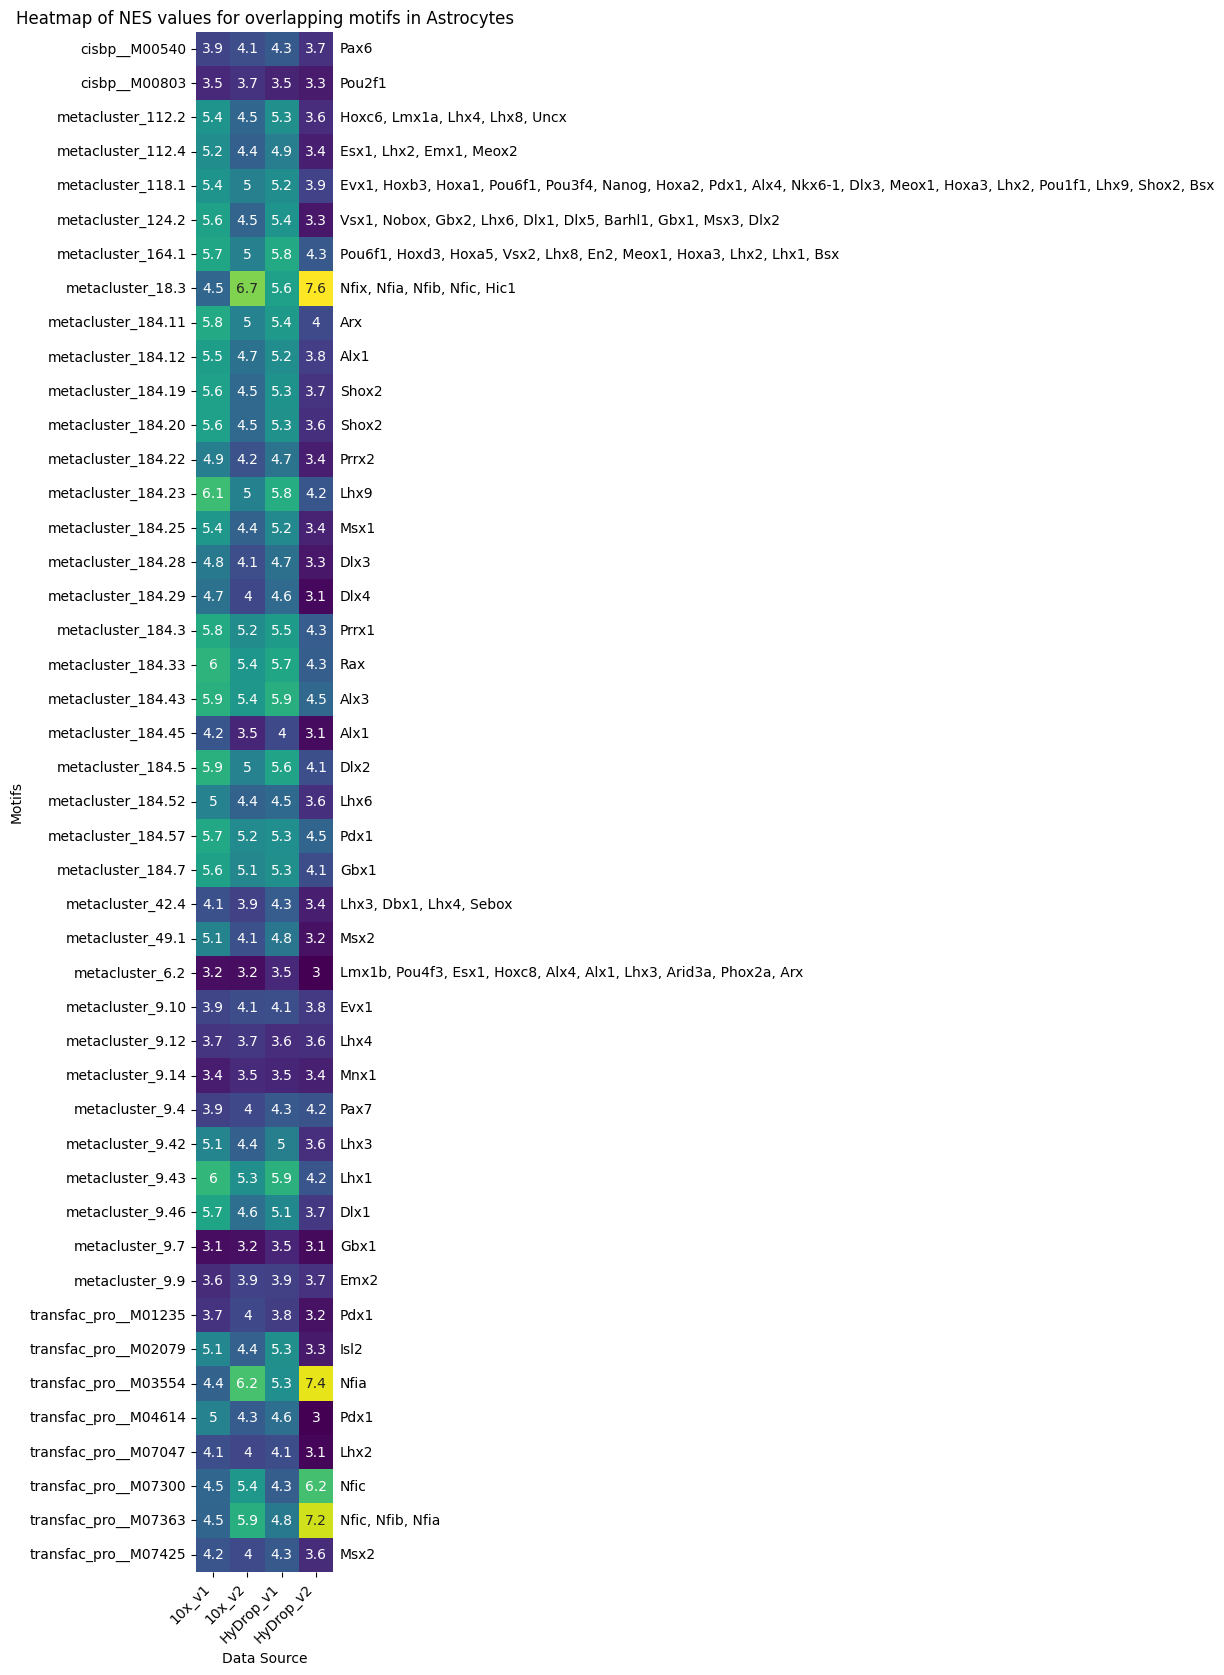

In [85]:
# Define the specific Region_set we are interested in
region_set = 'Astro'

# Extract motifs for the specific Region_set from all four datasets
motifs_hydrop_v2 = set(nes_scores_hydrop_v2.get(region_set, {}).keys())
motifs_hydrop_v1 = set(nes_scores_hydrop_v1.get(region_set, {}).keys())
motifs_10x_v1 = set(nes_scores_10x_v1.get(region_set, {}).keys())
motifs_10x_v2 = set(nes_scores_10x_v2.get(region_set, {}).keys())

# Find the intersection of the four sets (overlapping motifs)
overlapping_motifs = motifs_hydrop_v2 & motifs_hydrop_v1 & motifs_10x_v1 & motifs_10x_v2

# Initialize a DataFrame to store NES values and annotations
heatmap_data = pd.DataFrame(index=sorted(overlapping_motifs), columns=['10x_v1', '10x_v2', 'HyDrop_v1', 'HyDrop_v2'])
annotations = pd.DataFrame(index=sorted(overlapping_motifs), columns=['Direct_annot'])

# Populate the DataFrames with NES values and annotations
for motif in overlapping_motifs:
    heatmap_data.loc[motif, '10x_v1'] = nes_scores_10x_v1[region_set].get(motif, float('nan'))
    heatmap_data.loc[motif, '10x_v2'] = nes_scores_10x_v2[region_set].get(motif, float('nan'))
    heatmap_data.loc[motif, 'HyDrop_v1'] = nes_scores_hydrop_v1[region_set].get(motif, float('nan'))
    heatmap_data.loc[motif, 'HyDrop_v2'] = nes_scores_hydrop_v2[region_set].get(motif, float('nan'))
    annotations.loc[motif, 'Direct_annot'] = annotations_hydrop_v2[region_set].get(motif, float('nan'))

# Filter out rows where Direct_annot is NaN
valid_annotations = annotations.dropna()

# Keep only those motifs in the heatmap_data
heatmap_data_filtered = heatmap_data.loc[valid_annotations.index]

# Convert the DataFrame to float
heatmap_data_filtered = heatmap_data_filtered.astype(float)

# Plot the heatmap without the color bar (legend)
fig, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(heatmap_data_filtered, annot=True, cmap='viridis', cbar=False, square=True, ax=ax)
plt.title('Heatmap of NES values for overlapping motifs in Astrocytes')
plt.xlabel('Data Source')
plt.ylabel('Motifs')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Add the annotations as a separate text column
for i, motif in enumerate(heatmap_data_filtered.index):
    annot_text = valid_annotations.loc[motif, 'Direct_annot']
    ax.text(4.2, i + 0.5, annot_text, va='center', ha='left', fontsize=10, color='black')

plt.savefig("/user/leuven/350/vsc35050/lcb/hydrop_v2_paper/figures_paper/mcortex/visualization_cistopic/NES_heatmap_top1000_DARs_10x_HyDrop_Astro.png", dpi=500, bbox_inches='tight', pad_inches=0.2)

plt.show()

In [88]:
from scipy.stats import f_oneway
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

anova_results = f_oneway(
    heatmap_data_filtered['10x_v1'],
    heatmap_data_filtered['10x_v2'],
    heatmap_data_filtered['HyDrop_v1'],
    heatmap_data_filtered['HyDrop_v2']
)

# Display the results
anova_output = pd.DataFrame({
    'Statistic': [anova_results.statistic],
    'p-Value': [anova_results.pvalue]
})

print("ANOVA Results:")
print(anova_output)

melted_data = heatmap_data_filtered.melt(var_name='DataSource', value_name='NES_Value')

# Perform Tukey's HSD post-hoc test
tukey_results = pairwise_tukeyhsd(
    endog=melted_data['NES_Value'],  # Dependent variable
    groups=melted_data['DataSource'],  # Independent variable
    alpha=0.05  # Significance level
)

# Display results
print("ANOVA Results:")
print(f"Statistic: {anova_results.statistic:.4f}, p-Value: {anova_results.pvalue:.4f}")
print("\nTukey's HSD Post-Hoc Test Results:")
print(tukey_results)

# Optional: Save Tukey's results to a DataFrame
tukey_df = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
print("\nTukey's Test Results as DataFrame:")
print(tukey_df)

ANOVA Results:
   Statistic   p-Value
0   9.883419  0.000005
ANOVA Results:
Statistic: 9.8834, p-Value: 0.0000

Tukey's HSD Post-Hoc Test Results:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
   10x_v1    10x_v2  -0.3238 0.2963 -0.8011  0.1535  False
   10x_v1 HyDrop_v1  -0.0468 0.9942 -0.5241  0.4305  False
   10x_v1 HyDrop_v2  -0.8902    0.0 -1.3675 -0.4129   True
   10x_v2 HyDrop_v1    0.277 0.4364 -0.2003  0.7544  False
   10x_v2 HyDrop_v2  -0.5663 0.0128 -1.0436  -0.089   True
HyDrop_v1 HyDrop_v2  -0.8434 0.0001 -1.3207 -0.3661   True
----------------------------------------------------------

Tukey's Test Results as DataFrame:
      group1     group2  meandiff   p-adj   lower   upper  reject
0     10x_v1     10x_v2   -0.3238  0.2963 -0.8011  0.1535   False
1     10x_v1  HyDrop_v1   -0.0468  0.9942 -0.5241  0.4305   False
2     10x_v1  HyDrop_v2   -0.

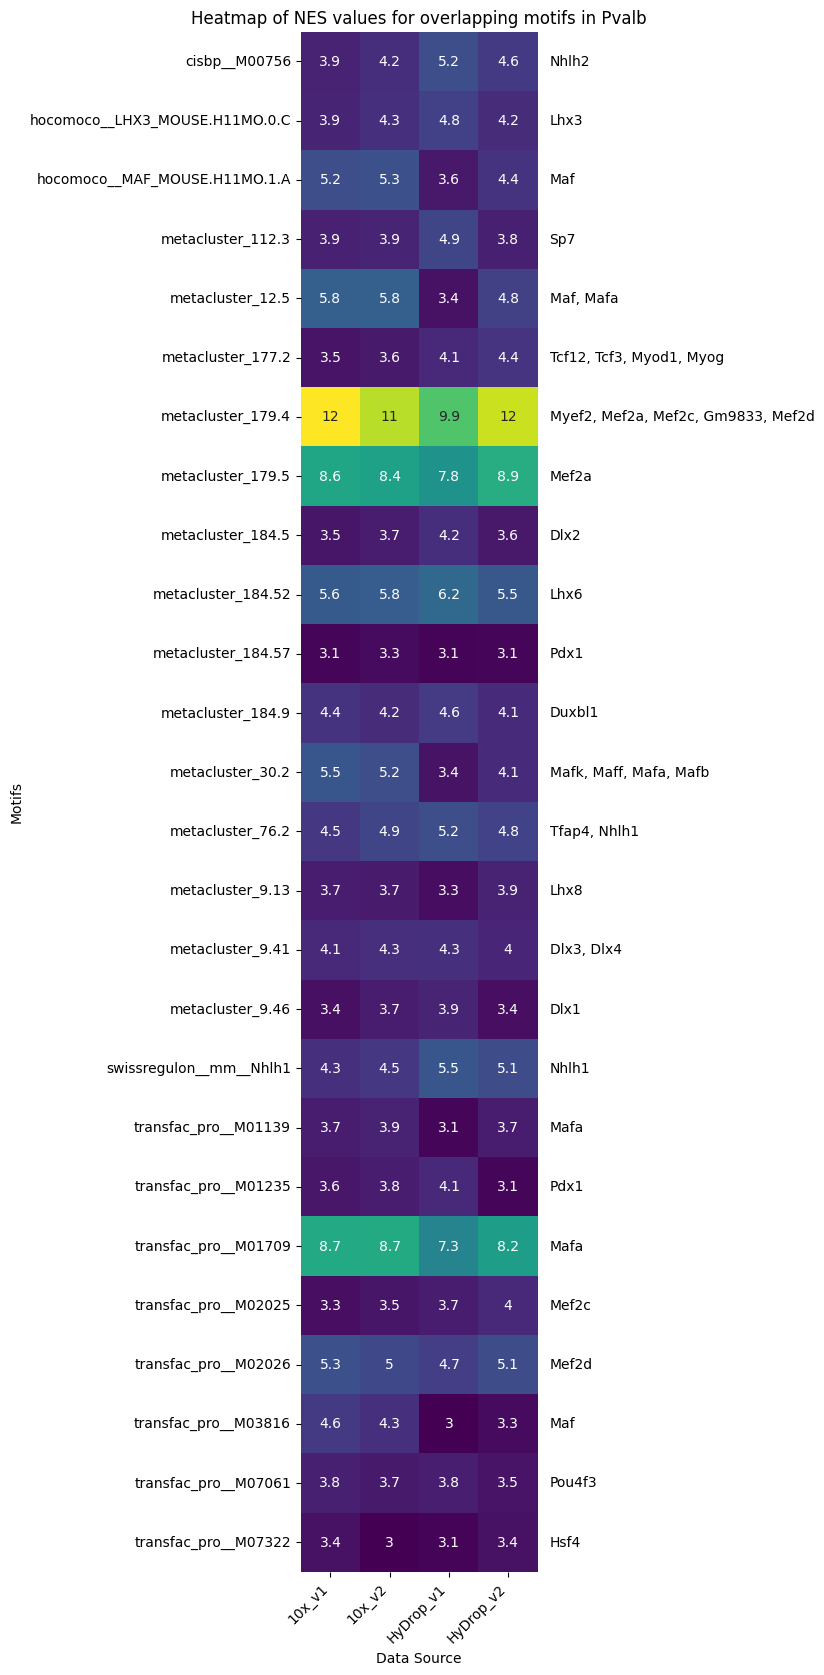

In [75]:
# Define the specific Region_set we are interested in
region_set = 'Pvalb'

# Extract motifs for the specific Region_set from all four datasets
motifs_hydrop_v2 = set(nes_scores_hydrop_v2.get(region_set, {}).keys())
motifs_hydrop_v1 = set(nes_scores_hydrop_v1.get(region_set, {}).keys())
motifs_10x_v1 = set(nes_scores_10x_v1.get(region_set, {}).keys())
motifs_10x_v2 = set(nes_scores_10x_v2.get(region_set, {}).keys())

# Find the intersection of the four sets (overlapping motifs)
overlapping_motifs = motifs_hydrop_v2 & motifs_hydrop_v1 & motifs_10x_v1 & motifs_10x_v2

# Initialize a DataFrame to store NES values and annotations
heatmap_data = pd.DataFrame(index=sorted(overlapping_motifs), columns=['10x_v1', '10x_v2', 'HyDrop_v1', 'HyDrop_v2'])
annotations = pd.DataFrame(index=sorted(overlapping_motifs), columns=['Direct_annot'])

# Populate the DataFrames with NES values and annotations
for motif in overlapping_motifs:
    heatmap_data.loc[motif, '10x_v1'] = nes_scores_10x_v1[region_set].get(motif, float('nan'))
    heatmap_data.loc[motif, '10x_v2'] = nes_scores_10x_v2[region_set].get(motif, float('nan'))
    heatmap_data.loc[motif, 'HyDrop_v1'] = nes_scores_hydrop_v1[region_set].get(motif, float('nan'))
    heatmap_data.loc[motif, 'HyDrop_v2'] = nes_scores_hydrop_v2[region_set].get(motif, float('nan'))
    annotations.loc[motif, 'Direct_annot'] = annotations_hydrop_v2[region_set].get(motif, float('nan'))

# Filter out rows where Direct_annot is NaN
valid_annotations = annotations.dropna()

# Keep only those motifs in the heatmap_data
heatmap_data_filtered = heatmap_data.loc[valid_annotations.index]

# Convert the DataFrame to float
heatmap_data_filtered = heatmap_data_filtered.astype(float)

# Plot the heatmap without the color bar (legend)
fig, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(heatmap_data_filtered, annot=True, cmap='viridis', cbar=False, square=True, ax=ax)
plt.title('Heatmap of NES values for overlapping motifs in Pvalb')
plt.xlabel('Data Source')
plt.ylabel('Motifs')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Add the annotations as a separate text column
for i, motif in enumerate(heatmap_data_filtered.index):
    annot_text = valid_annotations.loc[motif, 'Direct_annot']
    ax.text(4.2, i + 0.5, annot_text, va='center', ha='left', fontsize=10, color='black')

plt.savefig("/user/leuven/350/vsc35050/lcb/hydrop_v2_paper/figures_paper/mcortex/visualization_cistopic/NES_heatmap_top1000_DARs_10x_HyDrop_INH_PVALB.png", dpi=500, bbox_inches='tight', pad_inches=0.2)

plt.show()

In [80]:
from scipy.stats import f_oneway
import pandas as pd
anova_results = f_oneway(
    heatmap_data_filtered['10x_v1'],
    heatmap_data_filtered['10x_v2'],
    heatmap_data_filtered['HyDrop_v1'],
    heatmap_data_filtered['HyDrop_v2']
)

# Display the results
anova_output = pd.DataFrame({
    'Statistic': [anova_results.statistic],
    'p-Value': [anova_results.pvalue]
})

print("ANOVA Results:")
print(anova_output)

ANOVA Results:
   Statistic   p-Value
0   0.077586  0.971983
